In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diabetic_df = pd.read_csv('/content/drive/MyDrive/AIDA/CDBM_602_Data_Engineering/Project/diabetic_data.csv')

In [ ]:
diabetic_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41.0,0.0,1,0.0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59.0,0.0,18,0.0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11.0,5.0,13,2.0,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44.0,1.0,16,0.0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51.0,0.0,8,0.0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51.0,0.0,16,0.0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33.0,3.0,18,0.0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53.0,0.0,9,1.0,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,NaN,NaN,21,NaN,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
row_count,col_count = diabetic_df.shape

No of Row and Col count before cleaning

In [ ]:
print(f'Row Count: {row_count}')
print(f'Col Count: {col_count}')

Row Count: 101766
Col Count: 50


# Remove redundant Attributes

### Column Removal Explanation

Have removed the following columns from our dataset due to issues related to missing information and correlations:

- **`insulin`**: This column has a substantial amount of missing data and shows a high correlation with the `chage` attribute.
- **`weight`**: This column also contains a significant amount of missing information.
- **`max_glu_serum`**: Similar to the above, this column has a considerable amount of missing data.
- **`A1Cresult`**: This column also contains a significant amount of missing information.
- **`encounter_id`**: This column are not relevant for analysis
- **`patient_nbr`**: This column are not relevant for analysis

By removing these columns, we aim to improve the dataset's overall quality and reliability.


In [ ]:
diabetic_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41.0,0.0,1,0.0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59.0,0.0,18,0.0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11.0,5.0,13,2.0,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44.0,1.0,16,0.0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51.0,0.0,8,0.0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51.0,0.0,16,0.0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33.0,3.0,18,0.0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53.0,0.0,9,1.0,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,NaN,NaN,21,NaN,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
remove_list = ['insulin', 'weight', 'max_glu_serum','A1Cresult','encounter_id','patient_nbr']
diabetic_df = diabetic_df.drop(remove_list, axis=1)

In [ ]:
def analyze_missing_values(df, columns=None):
    if columns is None:
        columns = df.columns
    missing_value_list = []
    for col in columns:
        n_MV = df[col].isna().sum()
        if n_MV > 0:
            missing_value_list.append(col)
        print(f"{col} : {n_MV}")

    return missing_value_list

In [ ]:
diabetic_df.replace('?', pd.NA, inplace=True)
print("Number of Missing Vlaue")
missing_value_list = []
for col in diabetic_df.columns:
  n_MV = diabetic_df[col].isna().sum()
  if(n_MV > 0):
    missing_value_list.append(col)
    print(f"{col} : {n_MV}")

Number of Missing Vlaue
race : 2273
gender : 5088
age : 5088
payer_code : 40256
medical_specialty : 49949
num_lab_procedures : 28688
num_procedures : 28688
number_outpatient : 28688
diag_1 : 21
diag_2 : 358
diag_3 : 1423


In [ ]:
def calculate_missing_percentage(df):
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    return pd.DataFrame({
        'Column': missing_percentage.index,
        'Missing_Percentage': missing_percentage.values
    }).sort_values(by='Missing_Percentage', ascending=False)

In [ ]:
missing_percentage_df = calculate_missing_percentage(diabetic_df)
missing_percentage_df

,Column,Missing_Percentage
8,medical_specialty,49.082208
7,payer_code,39.557416
9,num_lab_procedures,28.190162
12,number_outpatient,28.190162
10,num_procedures,28.190162
2,age,4.999705
1,gender,4.999705
0,race,2.233555
17,diag_3,1.398306
16,diag_2,0.351787


## Removeing and Replacing missing values

## Handling MCAR value

- We will drop rows with missing values in the following columns:
  - `age`
  - `gender`
  - `race`
  - This is because the percentage of missing values in these columns is very small, and removing these rows will not significantly impact the dataset.

- For the columns `diag_1`, `diag_2`, and `diag_3`:
  - These are categorical columns.
  - Missing values will be replaced with the **mode** (most frequent value) of each respective column.
  - This approach ensures the integrity of the categorical data while addressing the missing values effectively.


In [ ]:
diabetic_df.dropna(subset=['age', 'gender', 'race'], inplace=True)

In [ ]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    most_frequent = diabetic_df[col].mode()[0]
    diabetic_df[col] = diabetic_df[col].fillna(most_frequent)

In [ ]:
missing_columns = analyze_missing_values(diabetic_df, ['age', 'gender', 'race','diag_1', 'diag_2', 'diag_3'])

age : 0
gender : 0
race : 0
diag_1 : 0
diag_2 : 0
diag_3 : 0


In [ ]:
mar_cols = ['num_lab_procedures', 'num_procedures', 'number_outpatient']

for col in mar_cols:
    diabetic_df[col] = diabetic_df[col].fillna(
        diabetic_df.groupby('time_in_hospital')[col].transform('median')
    )
    diabetic_df[col] = diabetic_df[col].fillna(diabetic_df[col].median())

In [ ]:
missing_columns = analyze_missing_values(diabetic_df, mar_cols)

num_lab_procedures : 0
num_procedures : 0
number_outpatient : 0


### Handling Missing Values for `payer_code` and `medical_specialty`

Handling missing values for 'payer_code' and 'medical_specialty' by replacing them with a placeholder.

Using placeholders is particularly useful in categorical data, where missing entries can later be grouped or analyzed separately to understand their impact on the overall dataset.



In [ ]:
# Handling missing values for 'payer_code' and 'medical_specialty' by replacing them with a placeholder.
diabetic_df['payer_code'] = diabetic_df['payer_code'].fillna('Unknown')
diabetic_df['medical_specialty'] = diabetic_df['medical_specialty'].fillna('Unknown Specialty')

In [ ]:
missing_columns = analyze_missing_values(diabetic_df, diabetic_df.columns)

race : 0
gender : 0
age : 0
admission_type_id : 0
discharge_disposition_id : 0
admission_source_id : 0
time_in_hospital : 0
payer_code : 0
medical_specialty : 0
num_lab_procedures : 0
num_procedures : 0
num_medications : 0
number_outpatient : 0
number_emergency : 0
number_inpatient : 0
diag_1 : 0
diag_2 : 0
diag_3 : 0
number_diagnoses : 0
metformin : 0
repaglinide : 0
nateglinide : 0
chlorpropamide : 0
glimepiride : 0
acetohexamide : 0
glipizide : 0
glyburide : 0
tolbutamide : 0
pioglitazone : 0
rosiglitazone : 0
acarbose : 0
miglitol : 0
troglitazone : 0
tolazamide : 0
examide : 0
citoglipton : 0
glyburide-metformin : 0
glipizide-metformin : 0
glimepiride-pioglitazone : 0
metformin-rosiglitazone : 0
metformin-pioglitazone : 0
change : 0
diabetesMed : 0
readmitted : 0


### Missing Data Handling Summary

We have successfully addressed all missing values across the dataset. Each attribute with missing data was carefully analyzed, and appropriate strategies were applied based on the nature of the attribute and the missing value types:

1. **Categorical Attributes**:
   - Replaced missing values with placeholder values (e.g., `"Unknown"`, `"Unknown Specialty"`) to preserve data integrity and allow further analysis.
   - Ensured these placeholder values are easily identifiable for potential grouping or separate insights.

2. **Numerical Attributes**:
   - Applied statistical techniques such as median or mode imputation where applicable.
   - Leveraged group-based imputation methods (e.g., `groupby` operations) to ensure contextually relevant imputations.

By handling missing data comprehensively, the dataset is now ready for exploratory data analysis, outlier detection, and subsequent modeling steps without the risk of biases or inaccuracies caused by missing values.


# Dealing with outliers


## Outlier Handling Decision(`encounter_id` and `patient_nbr`)

No adjustments will be made to address outliers for the attributes `encounter_id` and `patient_nbr`. These values are unique identifiers for patient encounters and individual patients, respectively. Since they are inherently unique and not indicative of any statistical anomaly, they do not require outlier handling or transformation. These attributes will be preserved as-is for analysis and modeling purposes.


## Dealing outliner for time_in_hospital,  num_lab_procedures, num_procedures, number_outpatient

In [ ]:
# Attributes to handle outliers
attributes = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_outpatient']

In [ ]:
# Function to detect and handle outliers using IQR
def outliers_analysis(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df[col].plot.box()
    plt.show()
    print(f"Column: {col} - Number of Outliers: {len(outliers)}")

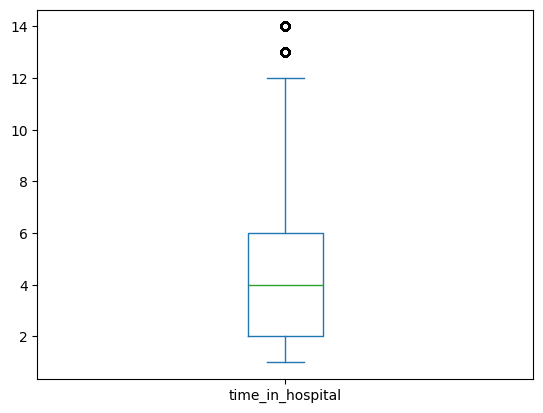

Column: time_in_hospital - Number of Outliers: 2109


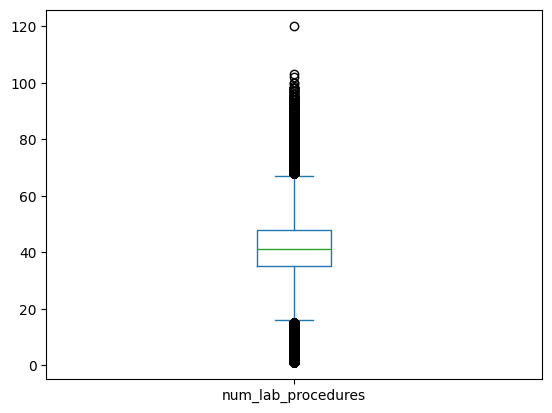

Column: num_lab_procedures - Number of Outliers: 12823


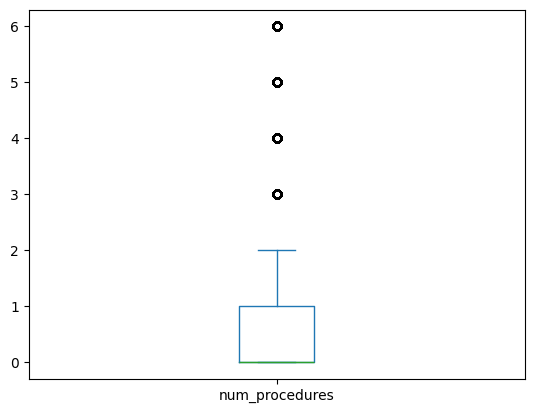

Column: num_procedures - Number of Outliers: 12033


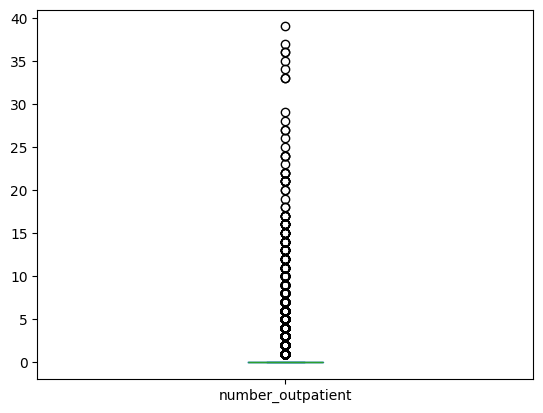

Column: number_outpatient - Number of Outliers: 11578


In [ ]:
for col in attributes:
    outliers_analysis(diabetic_df, col)

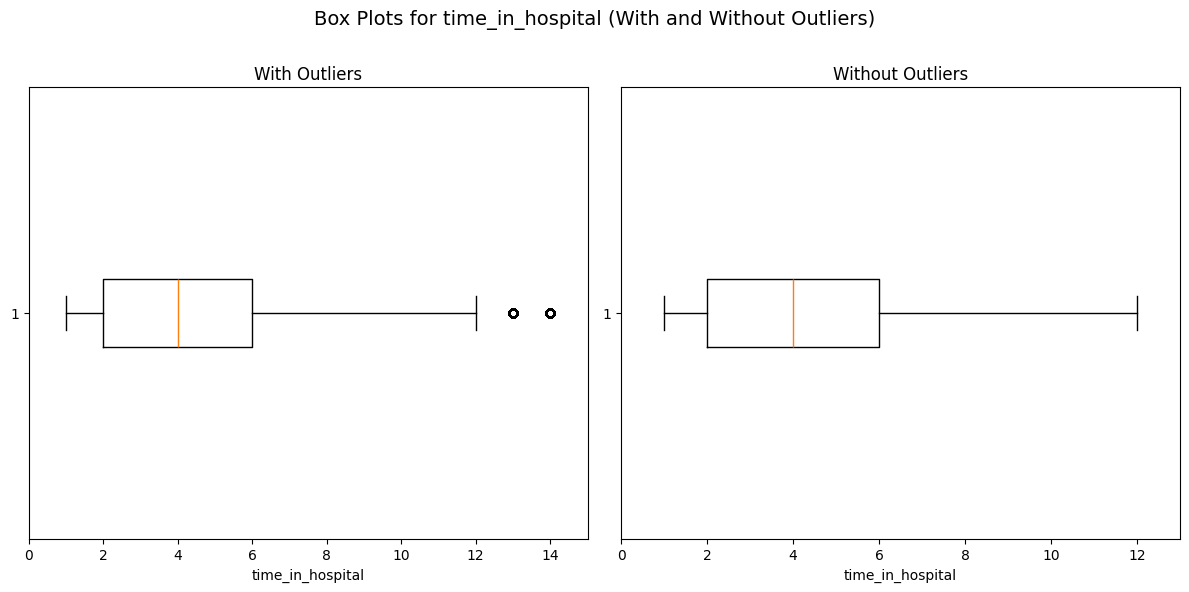

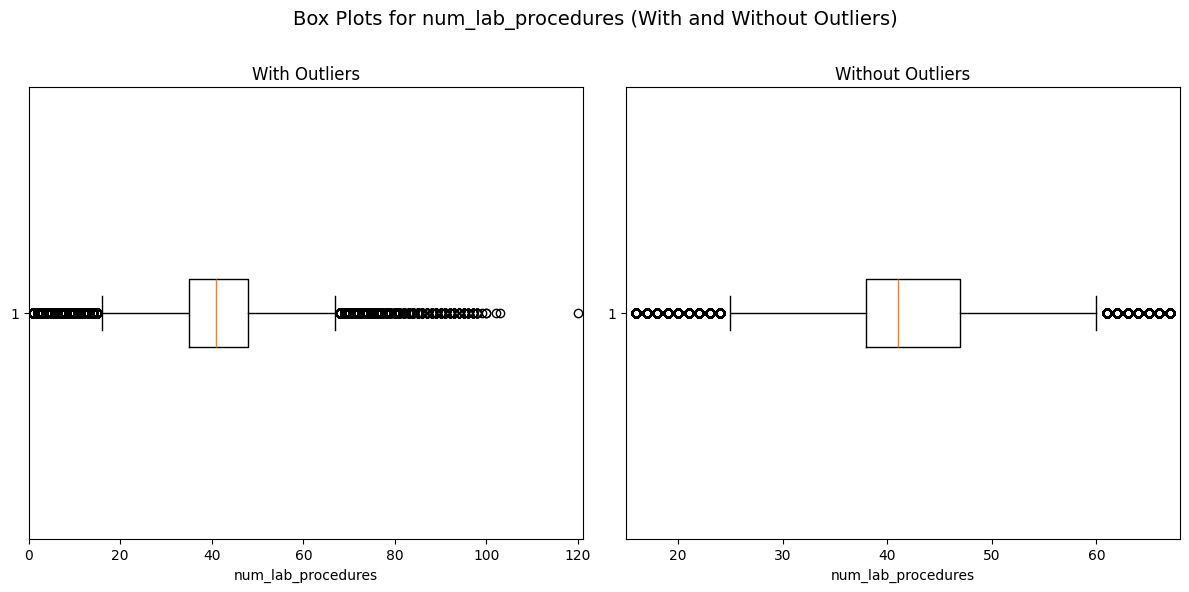

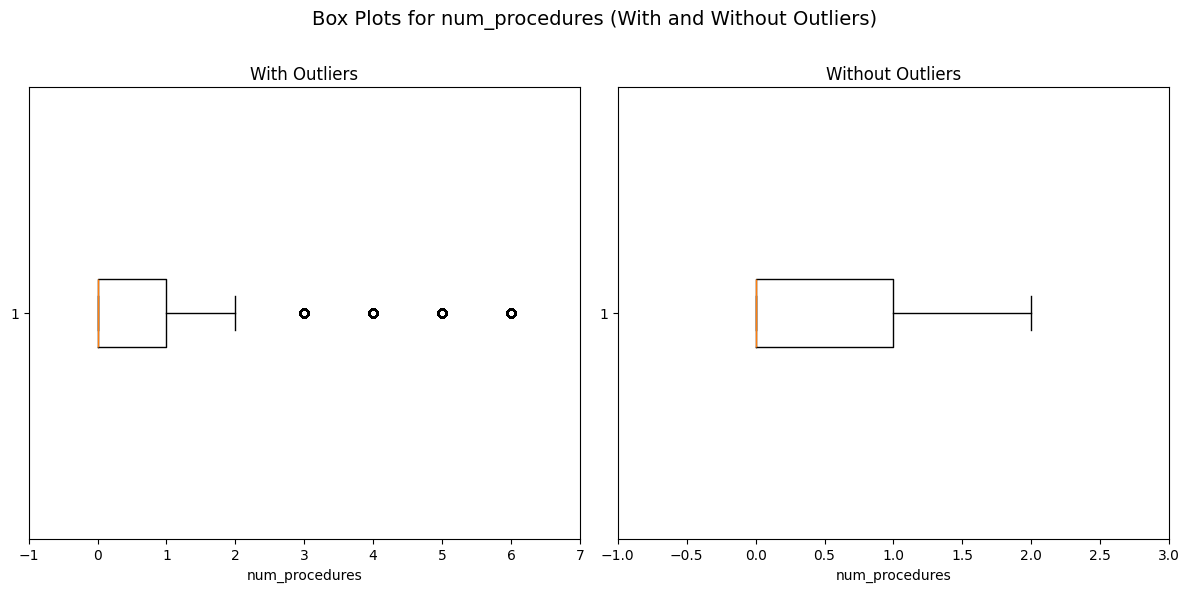

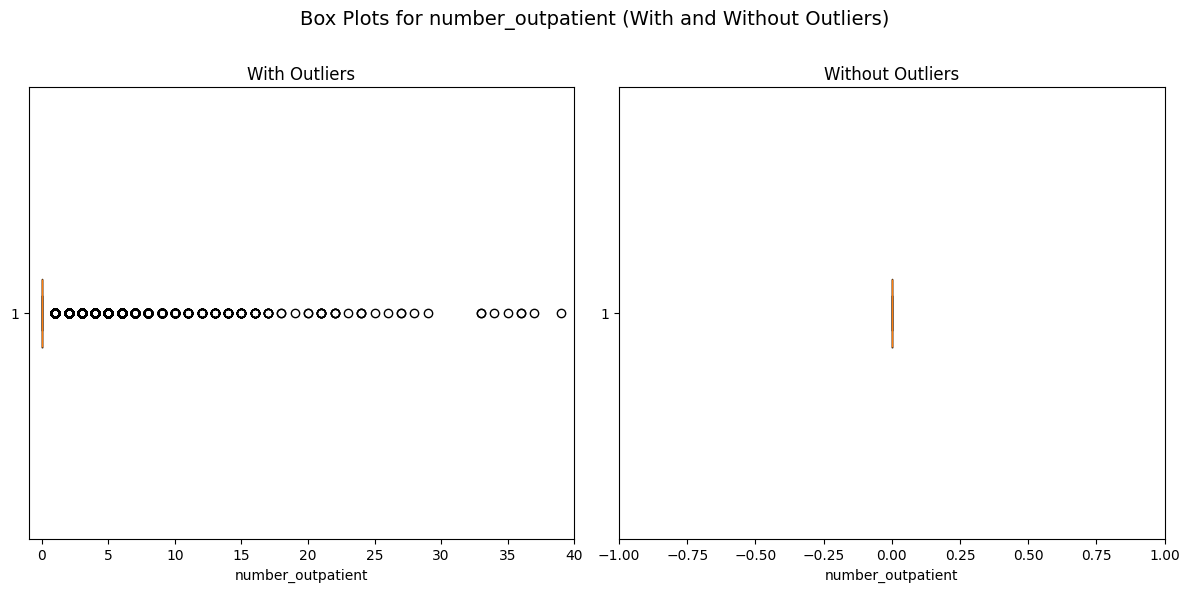

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to remove outliers using the Interquartile Range (IQR)
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Function to plot side-by-side box plots for columns with and without outliers
def plot_boxplot_with_and_without_outliers(data, columns):
    for column in columns:
        data_without_outliers = remove_outliers_iqr(data, column)

        # Create a figure
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        fig.suptitle(f"Box Plots for {column} (With and Without Outliers)", fontsize=14)

        # Box plot with outliers
        axes[0].boxplot(data[column].dropna(), vert=False)
        axes[0].set_title("With Outliers")
        axes[0].set_xlabel(column)
        # Set x-axis limits based on data with outliers
        x_min_outliers = np.min(data[column].dropna()) - 1
        x_max_outliers = np.max(data[column].dropna()) + 1
        axes[0].set_xlim(x_min_outliers, x_max_outliers)

        # Box plot without outliers
        axes[1].boxplot(data_without_outliers[column].dropna(), vert=False)
        axes[1].set_title("Without Outliers")
        axes[1].set_xlabel(column)
        # Set x-axis limits based on data without outliers
        x_min_no_outliers = np.min(data_without_outliers[column].dropna()) - 1
        x_max_no_outliers = np.max(data_without_outliers[column].dropna()) + 1
        axes[1].set_xlim(x_min_no_outliers, x_max_no_outliers)

        # Adjust layout for better display
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

columns_to_plot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures','number_outpatient']
plot_boxplot_with_and_without_outliers(diabetic_df, columns_to_plot)

 ## For clinical data such as `time_in_hospital` and `num_procedures`, where outliers might represent actual complex cases, it is often better to leave them unless they are proven to be data entry errors.

## Comparison of Original and Capped Data for 'number_outpatient'

The original analysis of the `number_outpatient` data revealed a significant skew due to outliers.

This approach has several benefits:
- **Reduction of Skewness**: By capping outliers, the distribution of `number_outpatient` becomes less skewed, allowing for more standard statistical methods to be effectively applied.
- **Retention of Data Integrity**: Capping at the 95th percentile ensures that we retain most of the data's original characteristics, avoiding the loss of crucial information that might occur with more aggressive methods like trimming or winsorizing.
- **Enhanced Model Performance**: Models built on data with reduced outliers are less likely to be influenced by extreme values, potentially improving their accuracy and robustness.

Visual comparisons, as shown in the plots, clearly demonstrate the effect of this capping approach, with a noticeable reduction in the range and variance of the data, aligning it more closely with typical patient experiences in the dataset.


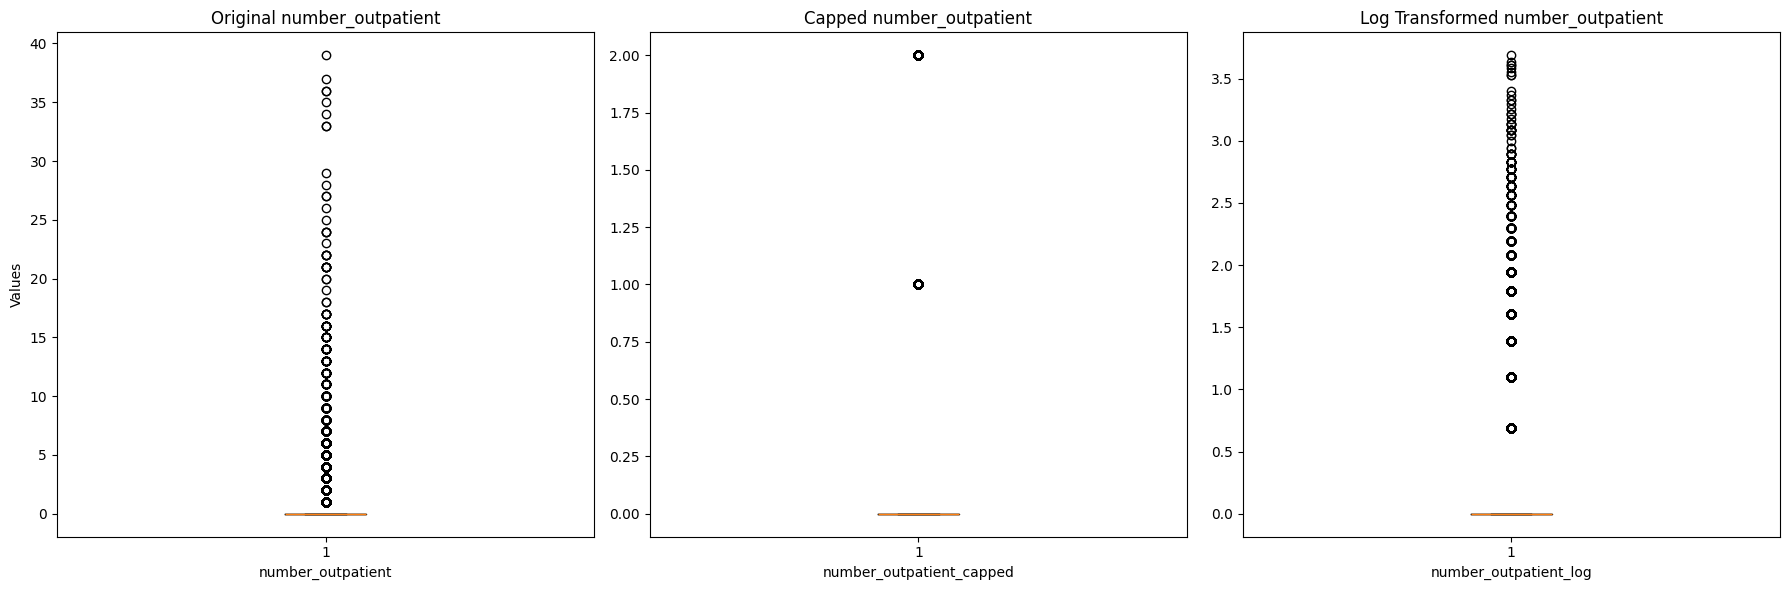

In [ ]:
percentile_95 = diabetic_df['number_outpatient'].quantile(0.95)
diabetic_df['number_outpatient_capped'] = diabetic_df['number_outpatient'].clip(upper=percentile_95)

# Applying a logarithmic transformation to 'number_outpatient' to reduce skewness
# Adding 1 to avoid log(0) which is undefined
diabetic_df['number_outpatient_log'] = np.log1p(diabetic_df['number_outpatient'])

# Function to plot original, capped, and transformed data
def plot_comparison(data, original_col, capped_col, transformed_col):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Original data plot
    axes[0].boxplot(data[original_col].dropna())
    axes[0].set_title(f'Original {original_col}')
    axes[0].set_xlabel(original_col)
    axes[0].set_ylabel('Values')

    # Capped data plot
    axes[1].boxplot(data[capped_col].dropna())
    axes[1].set_title(f'Capped {original_col}')
    axes[1].set_xlabel(capped_col)

    # Transformed data plot
    axes[2].boxplot(data[transformed_col].dropna())
    axes[2].set_title(f'Log Transformed {original_col}')
    axes[2].set_xlabel(transformed_col)

    plt.tight_layout()
    plt.show()

# Visualize the changes

plot_comparison(diabetic_df, 'number_outpatient', 'number_outpatient_capped', 'number_outpatient_log')

remove_list = [ 'number_outpatient_capped', 'number_outpatient_log']
diabetic_df = diabetic_df.drop(remove_list, axis=1)

## Outlier Handling in `number_outpatient`

Due to the presence of significant outliers in the 'number_outpatient' data, as evident from the initial analysis, we decided to cap the values at the 95th percentile.

The `number_outpatient` column in the DataFrame has been updated to reflect these changes. Outliers above the 95th percentile have been capped at this threshold value, ensuring that the data remains robust against extreme values without losing critical information.


In [ ]:
percentile_95 = diabetic_df['number_outpatient'].quantile(0.95)

diabetic_df['number_outpatient'] = diabetic_df['number_outpatient'].clip(upper=percentile_95)

## Handling Outliers in Age Groups

Given the analysis focus and the skewed distribution in the age data, especially for younger demographics, we opted to combine the `[0-10)` and `[10-20)` age categories into a single `[0-20)` group. This adjustment is intended to provide a more stable and meaningful representation of the younger population in our dataset, as these age groups were significantly less in count.


In [ ]:
def combine_age_groups(age):
    if age in ['[0-10)', '[10-20)']:
        return '[0-20)'
    else:
        return age

In [ ]:
diabetic_df['age'] = diabetic_df['age'].apply(combine_age_groups)

## Removal of Rare Admission Types

To enhance the robustness and relevancy of our analysis, we have opted to remove entries with `admission_type_id` values of `8`, `7`, and `4` from our dataset. These types represent a very small fraction of our data:

- `8`: 320 entries
- `7`: 21 entries
- `4`: 10 entries

In [ ]:
diabetic_df = diabetic_df[~diabetic_df['admission_type_id'].isin([8, 7, 4])]

# Display the new counts of 'admission_type_id' to confirm removal
print("Updated counts by admission_type_id after removing types 8, 7, and 4:")
print(diabetic_df['admission_type_id'].value_counts())

Updated counts by admission_type_id after removing types 8, 7, and 4:
admission_type_id
1    50267
3    17568
2    16908
6     4939
5     4512
Name: count, dtype: int64


## Decision to Retain Outliers in Diagnostic Codes

We have chosen to retain the outliers in the `diag_1`, `diag_2`, and `diag_3` fields of our dataset. This decision is informed by the following considerations:

- **Clinical Importance**: Outliers in these fields may represent rare, severe, or unusual medical conditions.

- **Integrity of Medical Data**: Modifying or removing these outliers could distort the real-world distribution of diagnoses, leading to misleading conclusions in our study.

In sum, keeping these outliers ensures that our analyses remain robust and reflective of true clinical scenarios.


## Removal of `discharge_disposition_id`

In our dataset, certain `discharge_disposition_id` values are significantly underrepresented, appearing less than 100 times.

### Justification:
- Removing these categories helps focus our analysis on discharge types with sufficient data to yield statistically significant insights.

This step helps to ensure that our analyses are not skewed by categories lacking sufficient data to support reliable conclusions.


In [ ]:
counts = diabetic_df['discharge_disposition_id'].value_counts()

# Find the IDs with fewer than 100 occurrences
rare_ids = counts[counts < 100].index

# Filter out rows where 'discharge_disposition_id' is in rare_ids
diabetic_df = diabetic_df[~diabetic_df['discharge_disposition_id'].isin(rare_ids)]

# Display the updated counts to confirm removal
print("Updated counts by discharge_disposition_id after removing infrequent categories:")
print(diabetic_df['discharge_disposition_id'].value_counts())

Updated counts by discharge_disposition_id after removing infrequent categories:
discharge_disposition_id
1     55651
3     12897
6     11998
18     3487
2      1963
22     1873
11     1513
5      1088
25      921
4       718
7       562
23      391
13      376
14      355
28      135
8       100
Name: count, dtype: int64


## Removal of `admission_source_id`

To streamline our dataset for more effective analysis, we have removed entries associated with infrequently occurring `admission_source_id` categories, specifically those appearing less than 100 times. This decision helps to focus our analytical efforts on more common sources of admission, which represent a more substantial portion of the dataset.

### Justification:
- **Statistical Robustness**: By excluding these rare categories, we enhance the statistical robustness of our analyses, avoiding skewed results driven by underrepresented data points.

In [ ]:
counts = diabetic_df['admission_source_id'].value_counts()

# Find the IDs with fewer than 100 occurrences
rare_ids = counts[counts < 100].index

# Filter out rows where 'admission_source_id' is in rare_ids
diabetic_df = diabetic_df[~diabetic_df['admission_source_id'].isin(rare_ids)]

# Display the updated counts to confirm removal
print("Updated counts by admission_source_id after removing infrequent categories:")
print(diabetic_df['admission_source_id'].value_counts())

Updated counts by admission_source_id after removing infrequent categories:
admission_source_id
7     53583
1     27196
17     6329
4      2837
6      1890
2       981
5       801
3       171
20      149
Name: count, dtype: int64


## Retention of `medical_specialty`

In our analysis, we have decided to retain all categories within the `medical_specialty` field of our dataset, regardless of the frequency of occurrence. This decision is driven by several key considerations that underscore the importance of a comprehensive dataset in healthcare analytics.

## Retention of Data Including Outliers for Diabetes Treatment Variables

In our dataset, various variables related to diabetes treatment and medication usage are pivotal for in-depth analysis and understanding of treatment patterns and outcomes. This includes a range of medications like 'glimepiride', 'insulin', and 'metformin-rosiglitazone', among others, as well as treatment indicators like 'change' and 'diabetesMed'. Given the importance of these variables, we have decided to retain all data points, including those considered outliers.

By retaining all values, including outliers, for these critical variables, our analysis will not only cater to the average patient scenario but also to the exceptions, thereby enriching our understanding and providing a holistic view of diabetes treatment across diverse patient populations.


# Error/Bad Data Handling

In [ ]:
# Display original counts for 'gender' for reference
# Filter the DataFrame to include only 'Male' or 'Female' entries
diabetic_df = diabetic_df[(diabetic_df['gender'] == 'Male') | (diabetic_df['gender'] == 'Female')]

# Display the updated counts to confirm the removal of bad data
print("\nUpdated gender counts after removing bad data:")
print(diabetic_df['gender'].value_counts())


Updated gender counts after removing bad data:
gender
Female    50551
Male      43386
Name: count, dtype: int64


In [ ]:
diabetic_df.to_csv('final_diabetic_data.csv')

# Re-run statistical analysis and re-plot

In [ ]:
diabetic_df.describe(include='all')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,93937,93937,93937,93937.000000,93937.000000,93937.000000,93937.000000,93937,93937,93937.000000,93937.000000,93937.000000,93937.000000,93937.000000,93937.000000,93937,93937,93937,93937.000000,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937,93937
unique,5,2,9,NaN,NaN,NaN,NaN,17,73,NaN,NaN,NaN,NaN,NaN,NaN,709,738,782,NaN,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,2,2,1,2,2,2,3
top,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,Unknown,Unknown Specialty,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,71888,50551,24098,NaN,NaN,NaN,NaN,37351,46165,NaN,NaN,NaN,NaN,NaN,NaN,6423,6616,11822,NaN,75498,92487,93281,93857,89190,93936,82271,84090,93915,87165,88035,93651,93899,93934,93900,93937,93937,93292,93924,93936,93937,93936,50607,72155,50323
mean,NaN,NaN,NaN,2.005802,3.718482,5.770016,4.401205,NaN,NaN,40.122263,0.823265,16.021962,0.182644,0.202008,0.643612,NaN,NaN,NaN,7.447172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.410731,5.285003,4.065906,2.986687,NaN,NaN,16.045117,1.449829,8.115127,0.519335,0.948730,1.272159,NaN,NaN,NaN,1.923795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,35.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,41.000000,0.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,48.000000,1.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## Re-plot Numerical Attributes

In [ ]:
numerical_attributes = [
   'time_in_hospital', 'num_lab_procedures','num_medications', 'number_diagnoses','num_procedures', 'number_outpatient', 'number_inpatient'
]

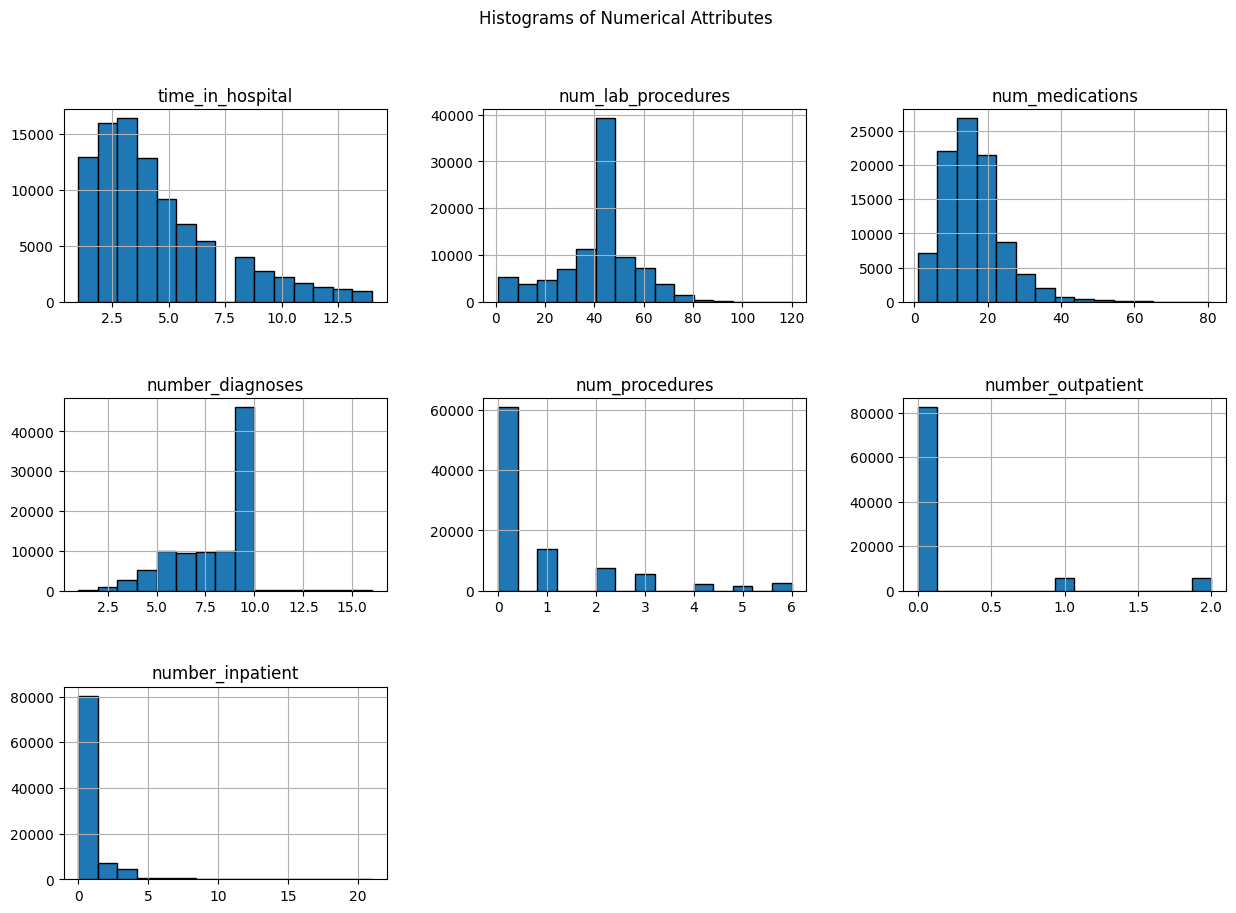

In [ ]:
# Plot histograms for all numerical attributes
diabetic_df[numerical_attributes].hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Histograms of Numerical Attributes')
plt.show()

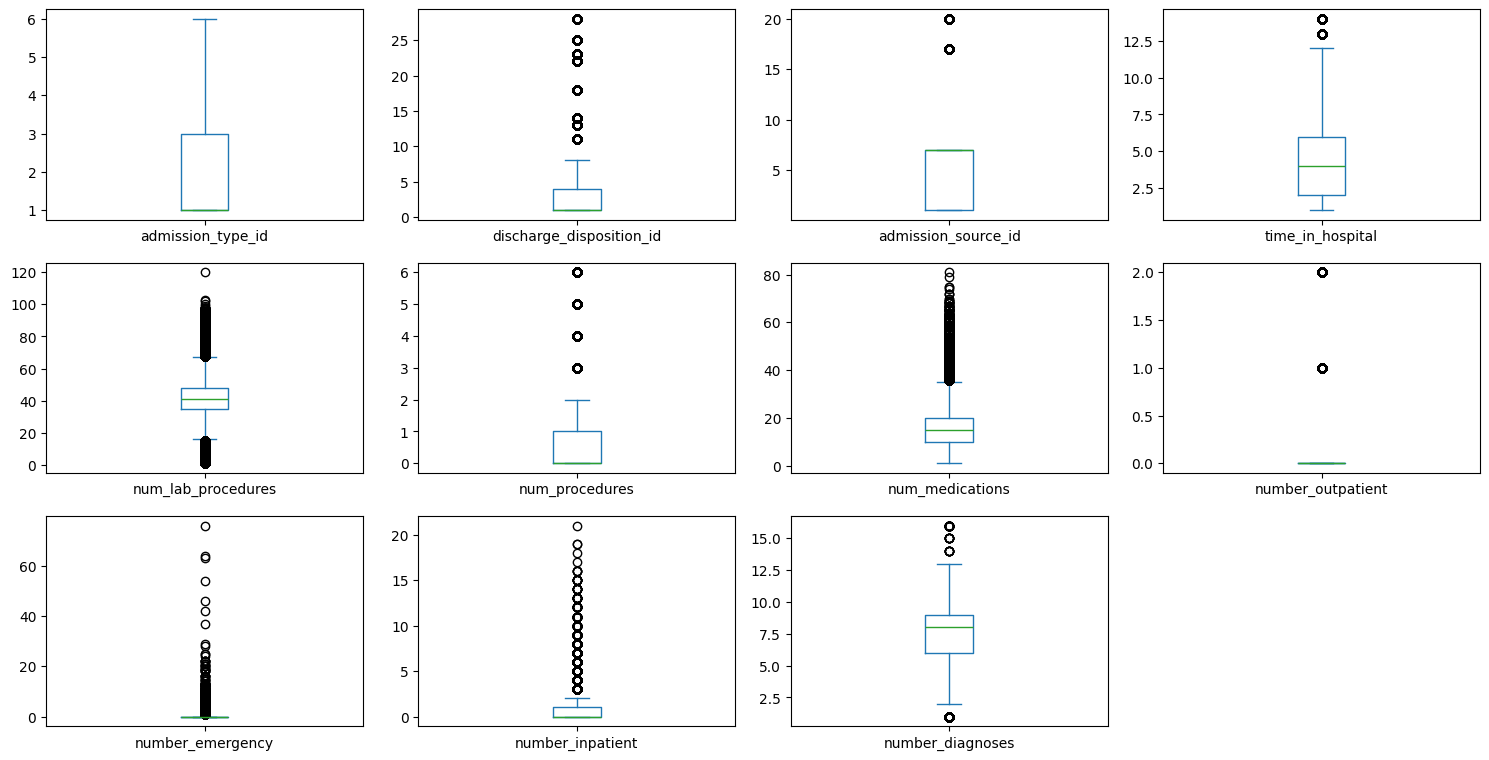

In [ ]:
# Plot boxplots for numerical variables to check for outliers
diabetic_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

<ipython-input-38-95bfc9d3ab5d>:21: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim([lower_bound, extended_upper_bound])


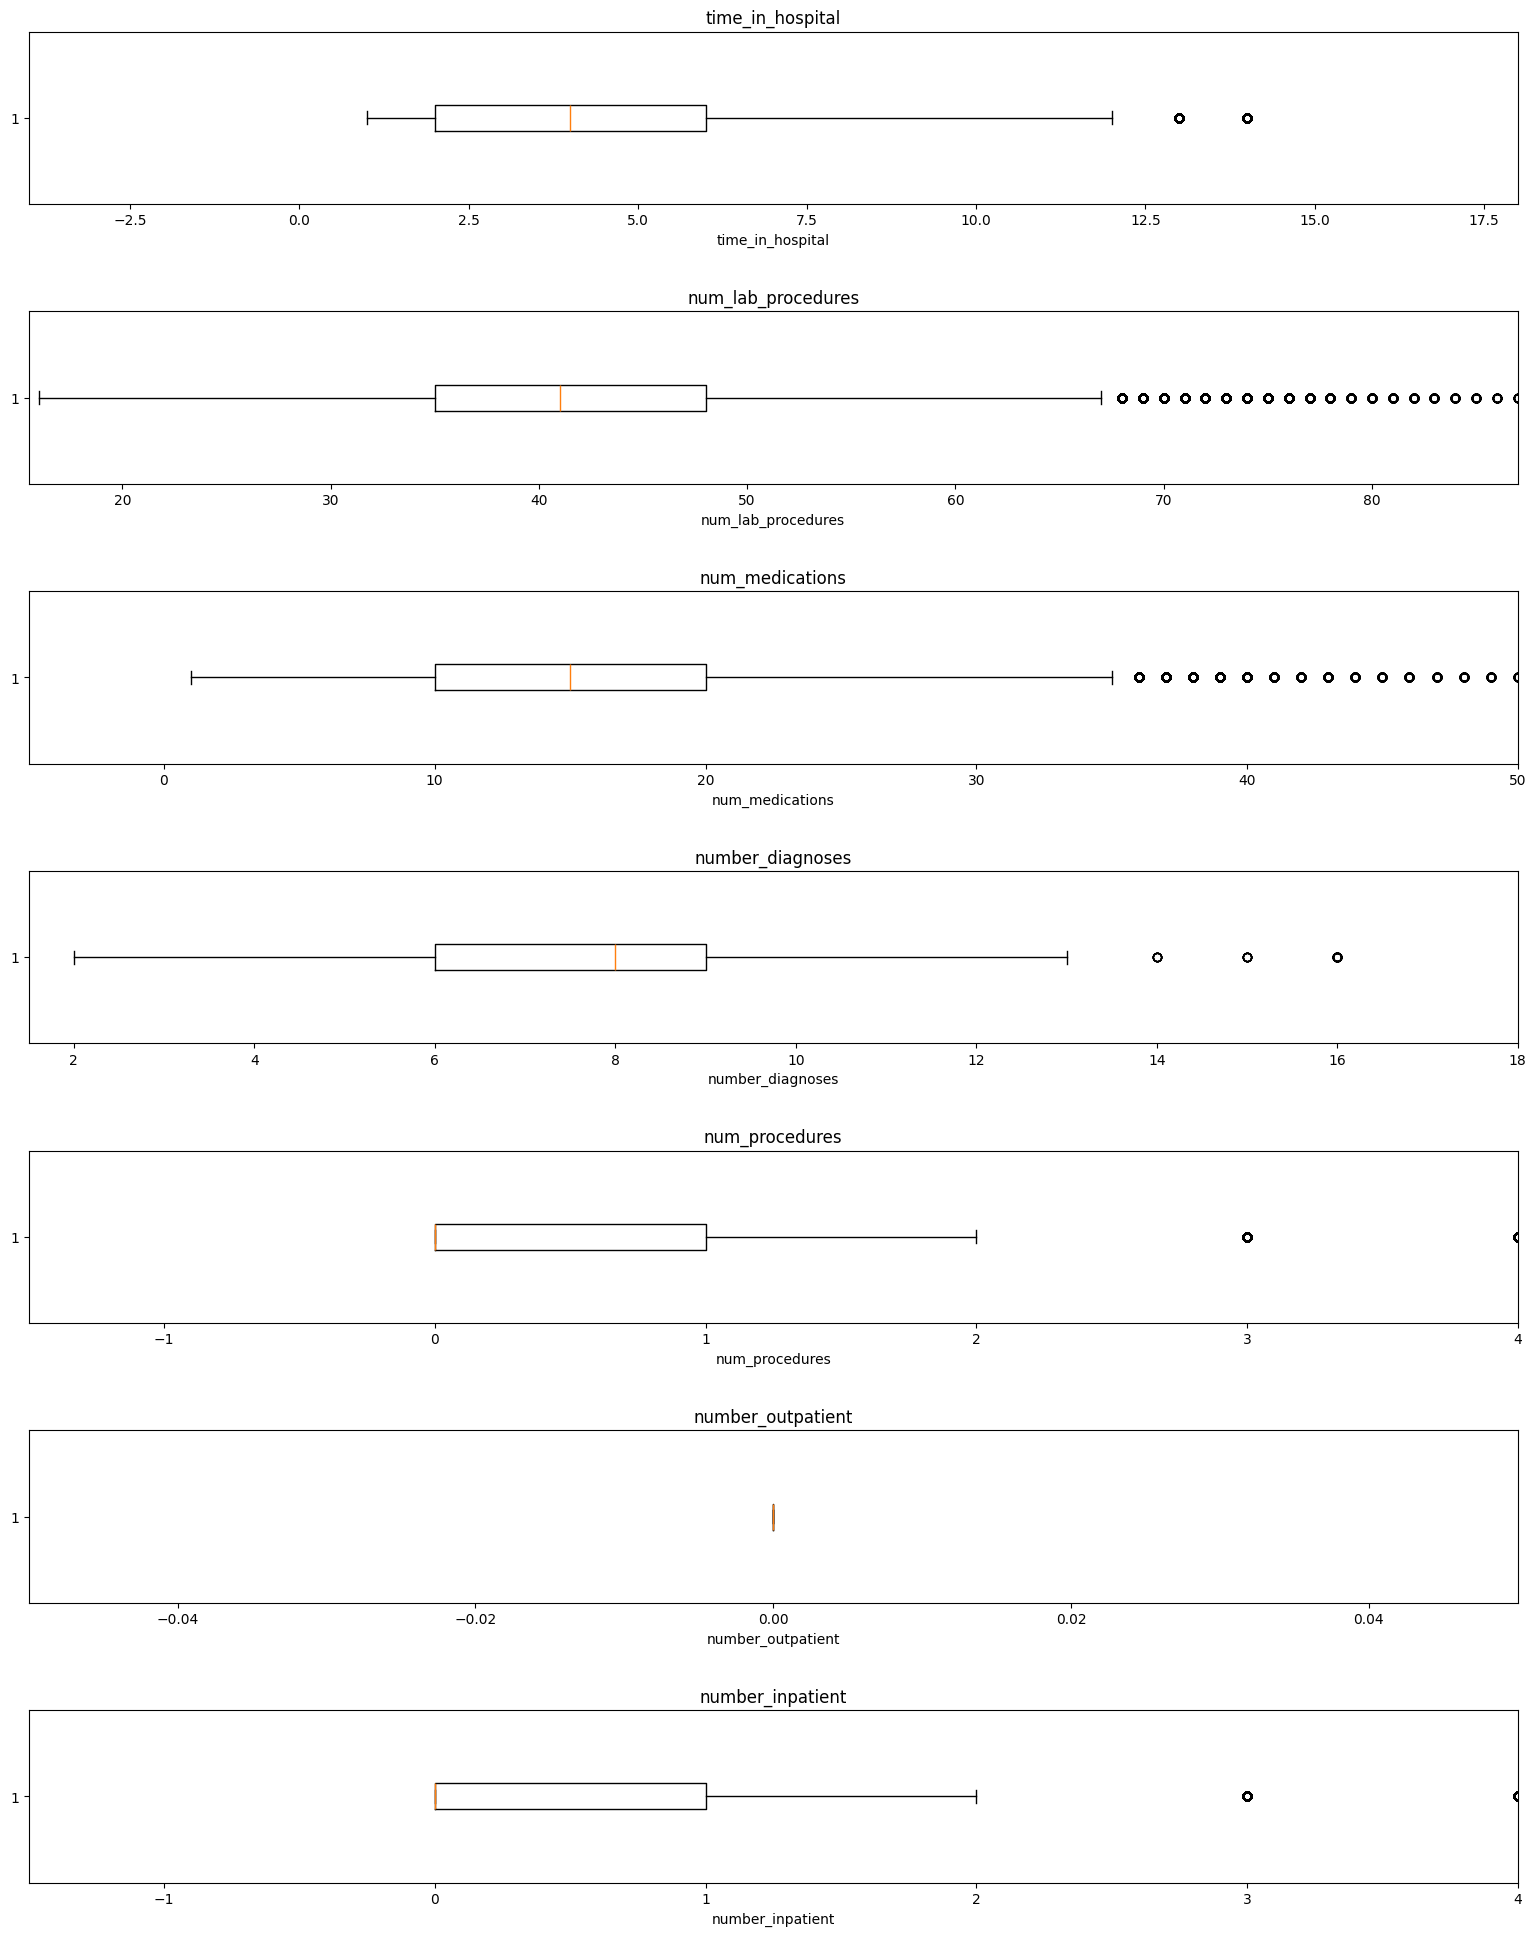

In [ ]:
# Plot boxplots for all numerical attributes to check for any remaining outliers
fig, axs = plt.subplots(nrows=len(numerical_attributes), ncols=1, figsize=(16, 20))

for i, var in enumerate(numerical_attributes):
    # Calculate the IQR and use it to define the x-axis limits
    Q1 = diabetic_df[var].quantile(0.25)
    Q3 = diabetic_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extend the upper bound to include more data, if necessary
    extended_upper_bound = Q3 + 3 * IQR

    # Plot the boxplot
    axs[i].boxplot(diabetic_df[var].dropna(), vert=False)
    axs[i].set_title(var)
    axs[i].set_xlabel(var)

    # Set x-axis limits to focus around the IQR but still show outliers
    axs[i].set_xlim([lower_bound, extended_upper_bound])

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
import seaborn as sns

<Axes: >

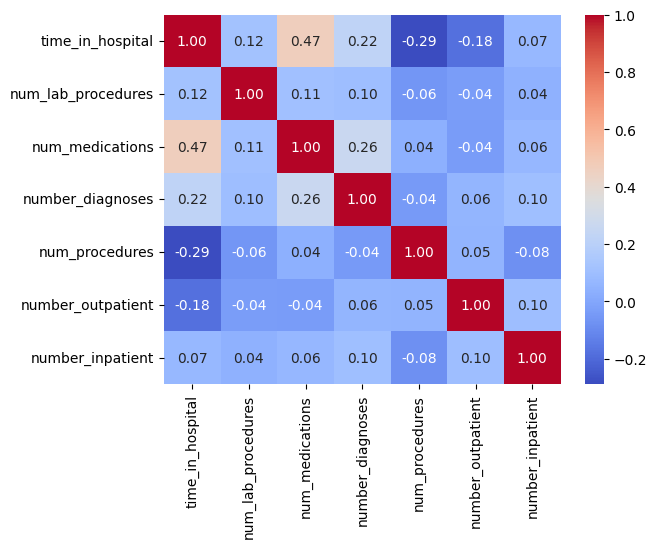

In [ ]:
corr_matrix = diabetic_df[numerical_attributes].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

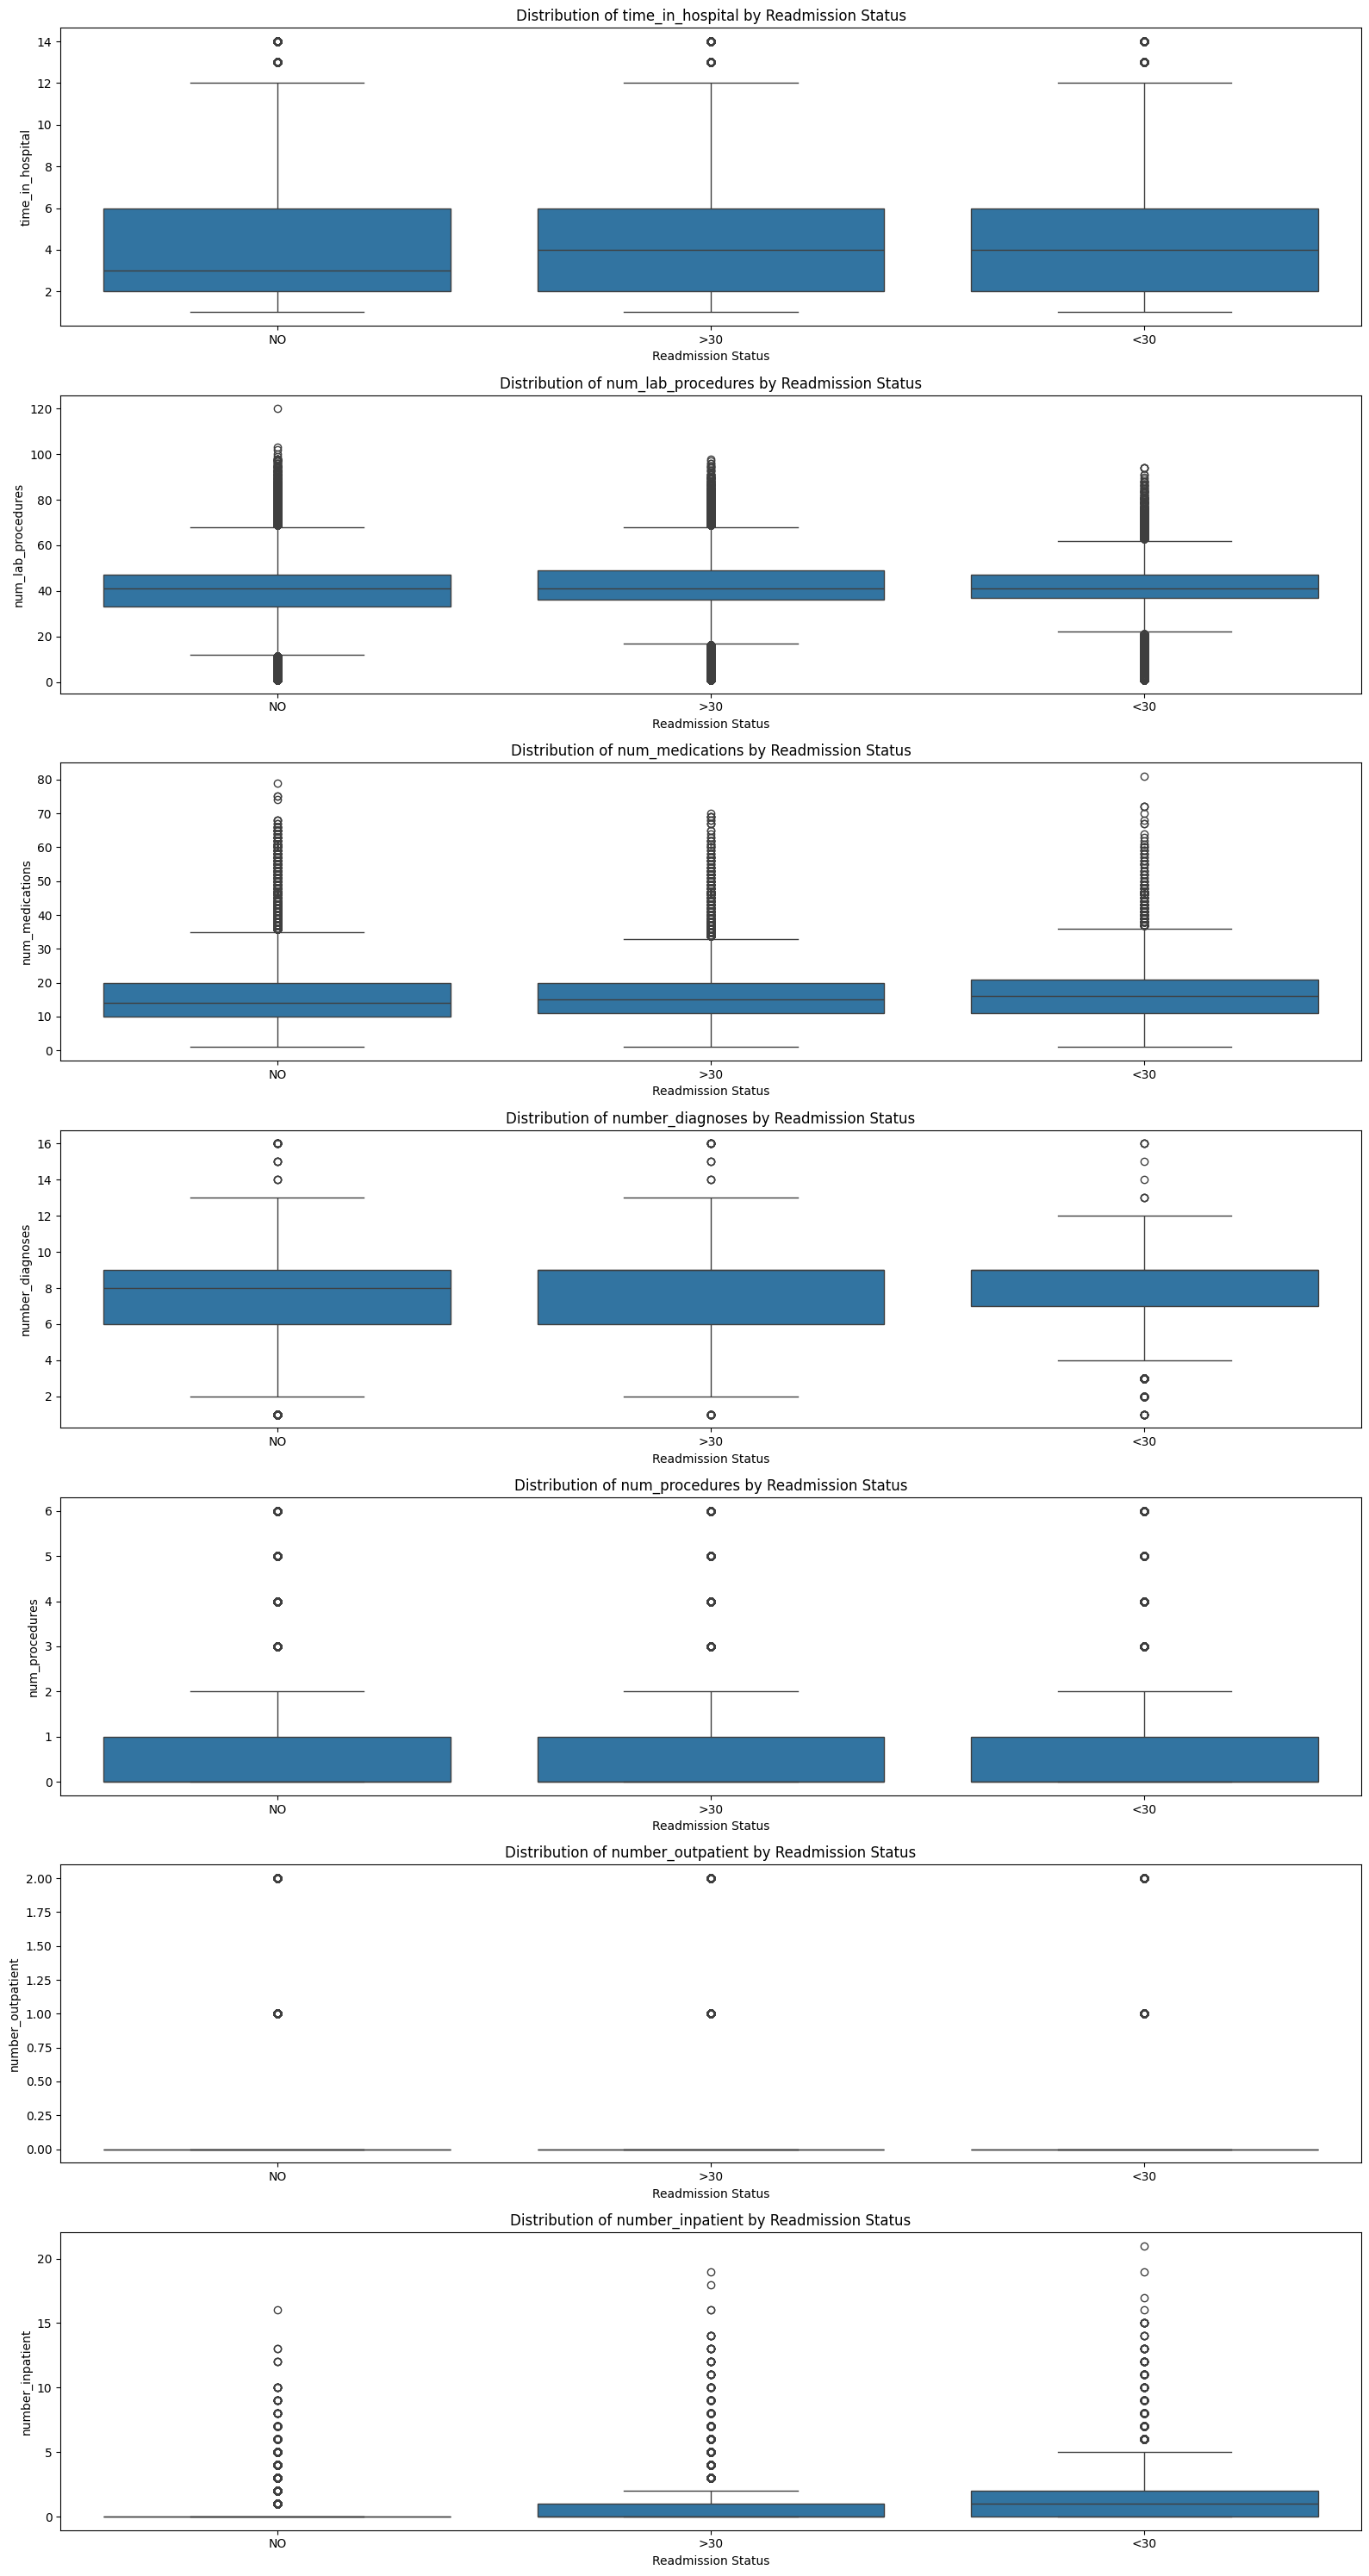

In [ ]:
fig, axes = plt.subplots(nrows=len(numerical_attributes), ncols=1, figsize=(16, 30))

# Loop through each numerical attribute to create a boxplot grouped by 'readmitted'
for i, var in enumerate(numerical_attributes):
    sns.boxplot(x='readmitted', y=var, data=diabetic_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Readmission Status')
    axes[i].set_xlabel('Readmission Status')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [ ]:
categorical_attributes = [
    'race','gender', 'age', 'admission_type_id', 'diag_1', 'diag_2', 'diag_3',
    'discharge_disposition_id', 'admission_source_id', 'payer_code',
    'medical_specialty', 'metformin',
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-pioglitazone', 'metformin-rosiglitazone', 'change',
    'diabetesMed', 'readmitted'
]

In [ ]:
import matplotlib.pyplot as plt

def categorical_plots(df, col):
    # Get the counts of each category, sorted by count
    value_counts = df[col].value_counts()
    print(value_counts)

    # Plot only the top 20 categories
    plt.figure(figsize=(16, 7))
    value_counts[:20].plot.bar()  # Adjust here to show only top 20 categories
    plt.title(f'Distribution of Top 20 Categories in {col}')
    plt.ylabel('Counts')
    plt.xlabel('Categories')
    plt.show()

Outliers for race
race
Caucasian          71888
AfricanAmerican    18079
Hispanic            1928
Other               1428
Asian                614
Name: count, dtype: int64


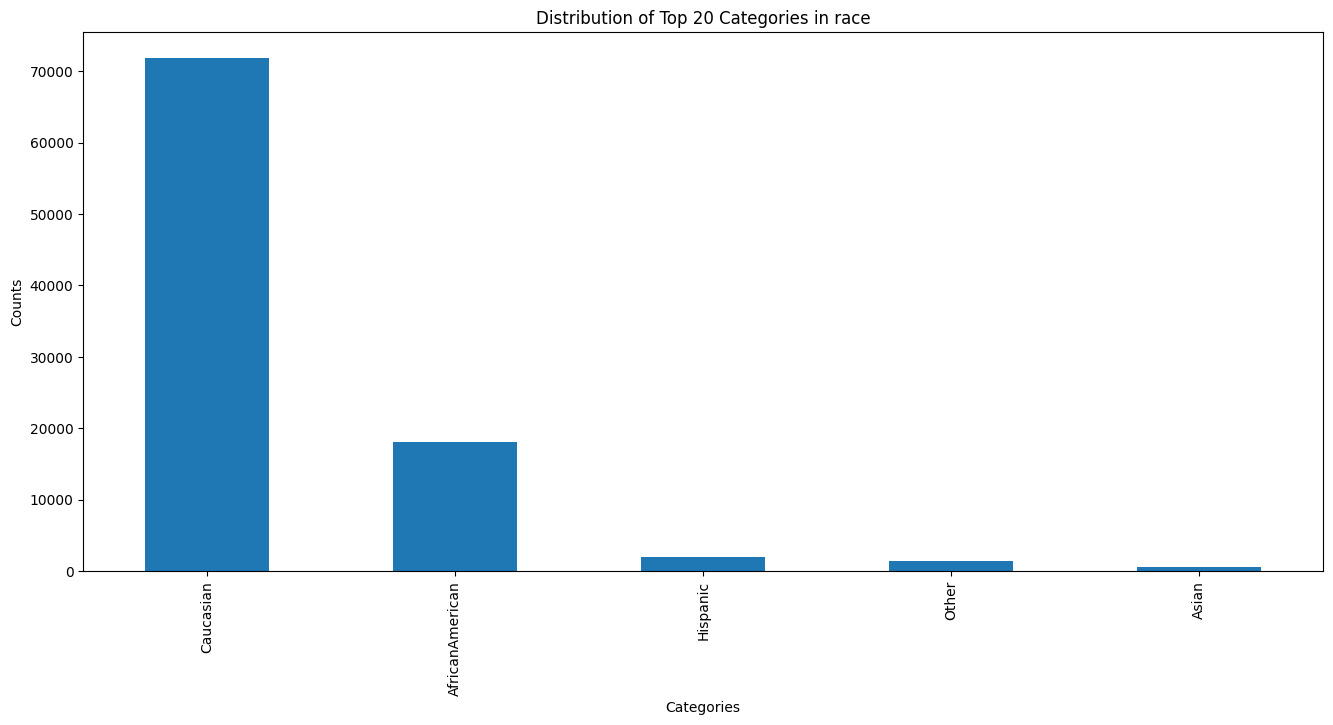

Outliers for gender
gender
Female    50551
Male      43386
Name: count, dtype: int64


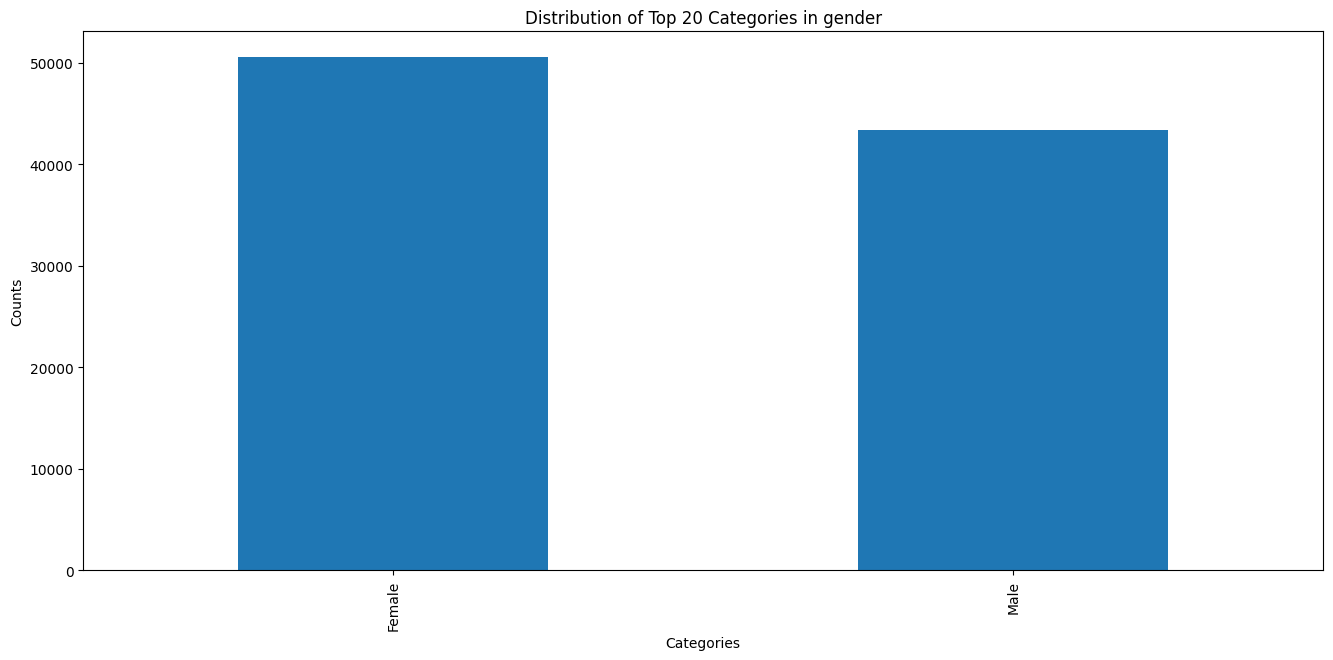

Outliers for age
age
[70-80)     24098
[60-70)     20799
[50-60)     15905
[80-90)     15839
[40-50)      8940
[30-40)      3484
[90-100)     2565
[20-30)      1518
[0-20)        789
Name: count, dtype: int64


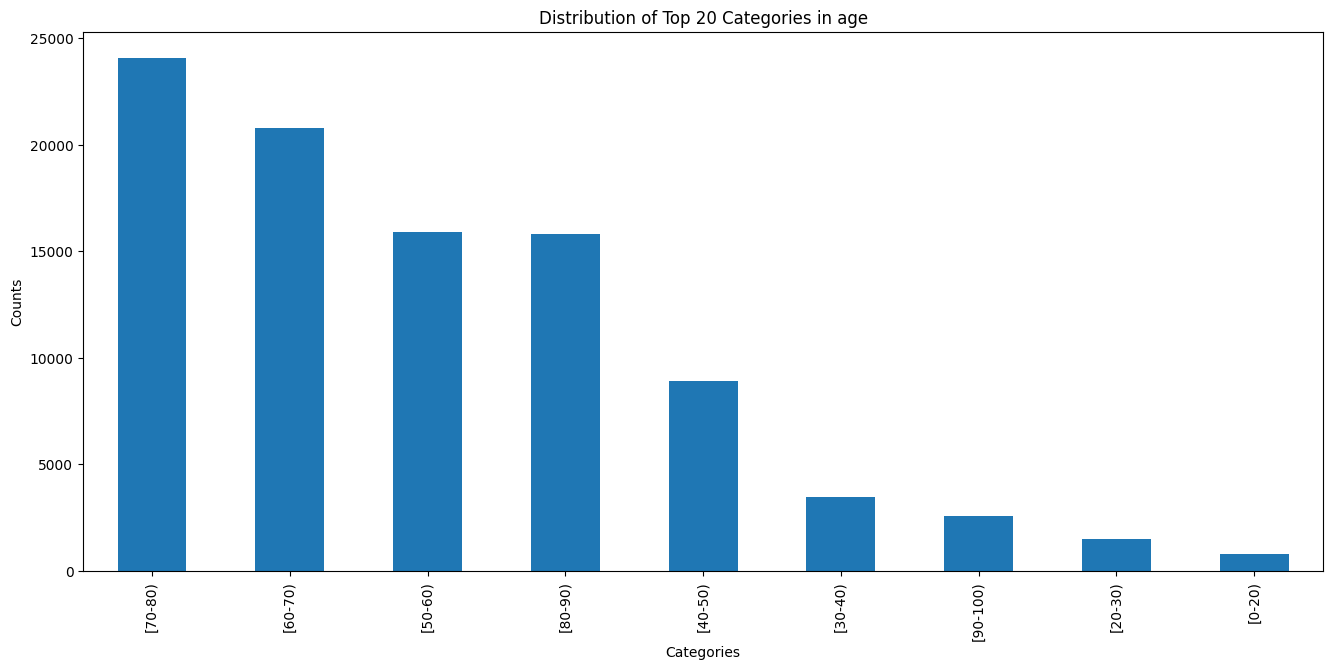

Outliers for admission_type_id
admission_type_id
1    50165
3    17530
2    16825
6     4929
5     4488
Name: count, dtype: int64


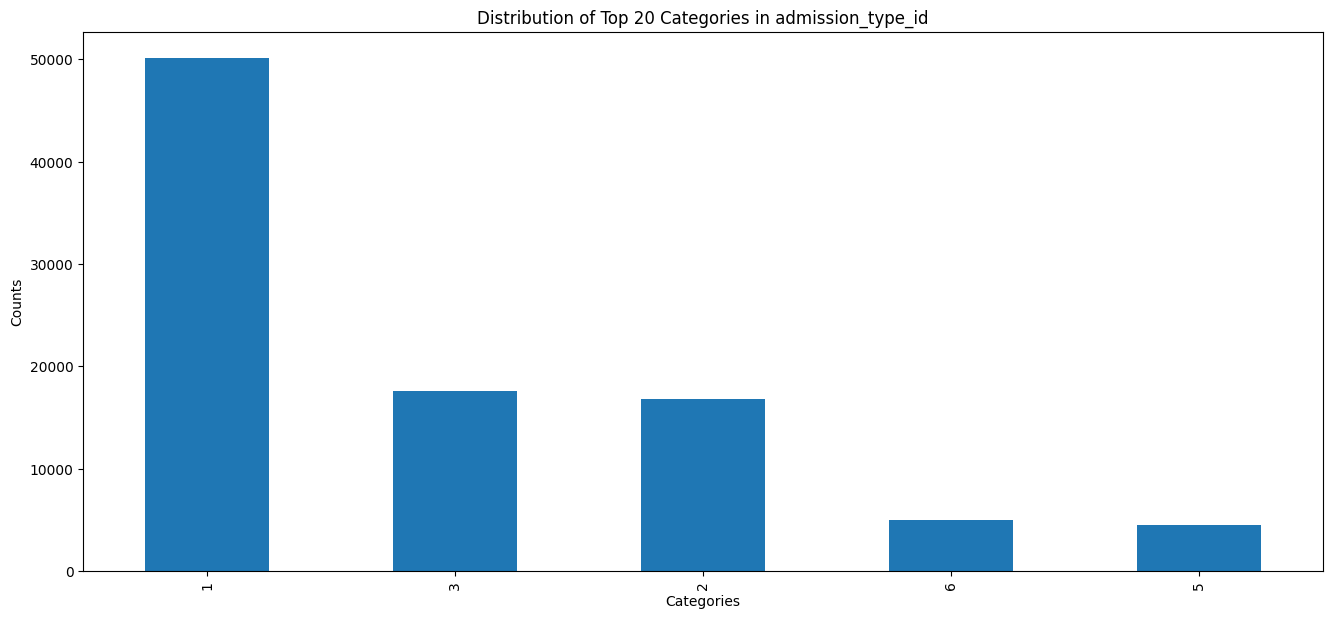

Outliers for diag_1
diag_1
428    6423
414    6068
786    3697
410    3336
486    3242
       ... 
982       1
217       1
143       1
471       1
V51       1
Name: count, Length: 709, dtype: int64


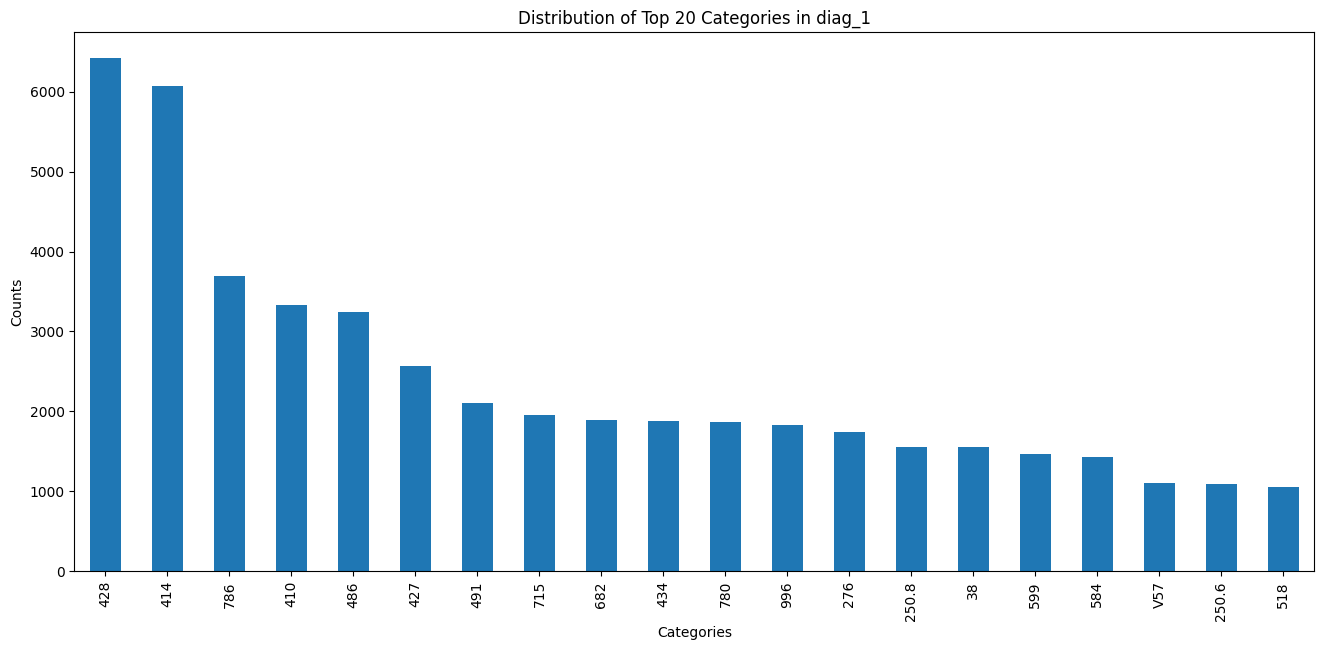

Outliers for diag_2
diag_2
276     6616
428     6135
250     5527
427     4649
401     3411
        ... 
E829       1
111        1
977        1
915        1
927        1
Name: count, Length: 738, dtype: int64


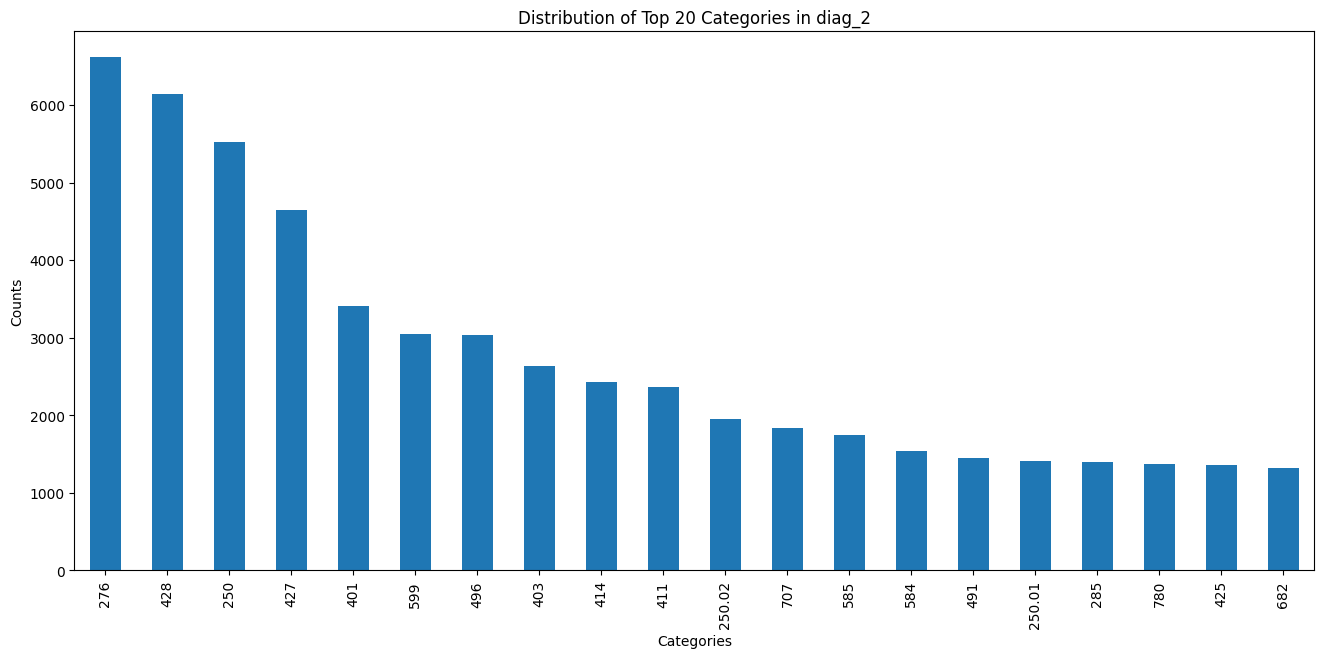

Outliers for diag_3
diag_3
250    11822
401     7608
276     4830
428     4224
427     3665
       ...  
657        1
992        1
V22        1
754        1
971        1
Name: count, Length: 782, dtype: int64


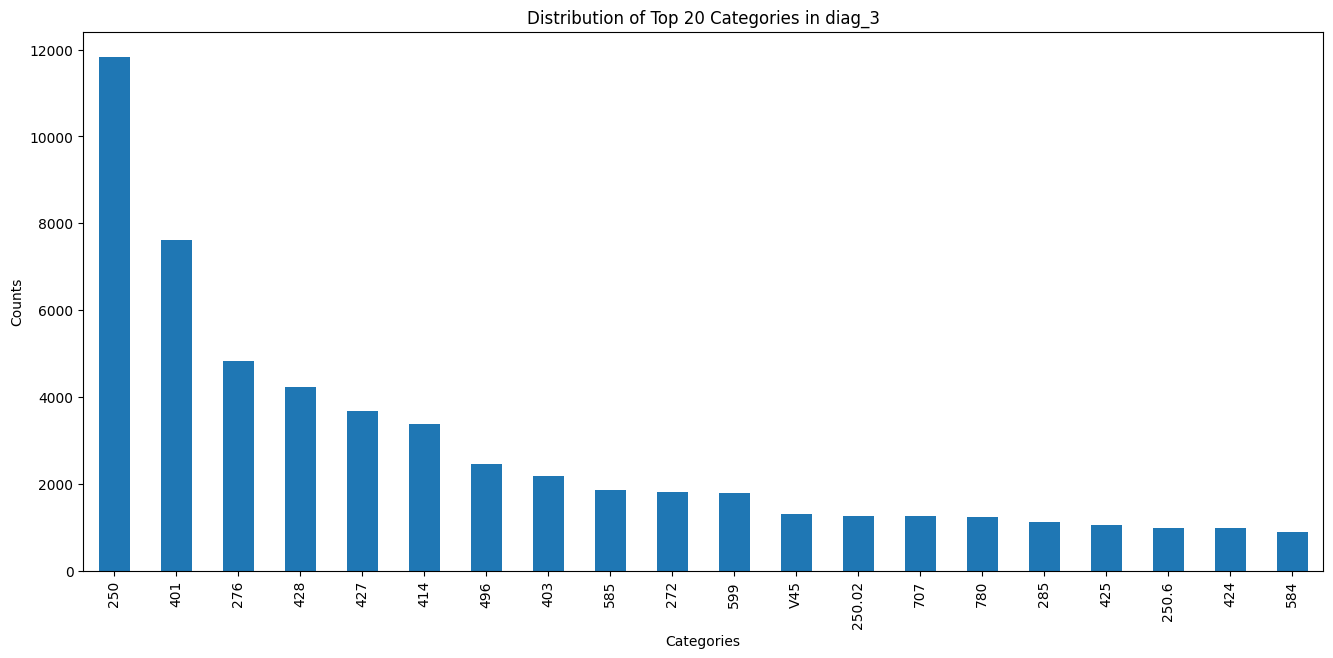

Outliers for discharge_disposition_id
discharge_disposition_id
1     55593
3     12890
6     11985
18     3487
2      1960
22     1870
11     1512
5      1082
25      921
4       718
7       562
23      391
13      376
14      355
28      135
8       100
Name: count, dtype: int64


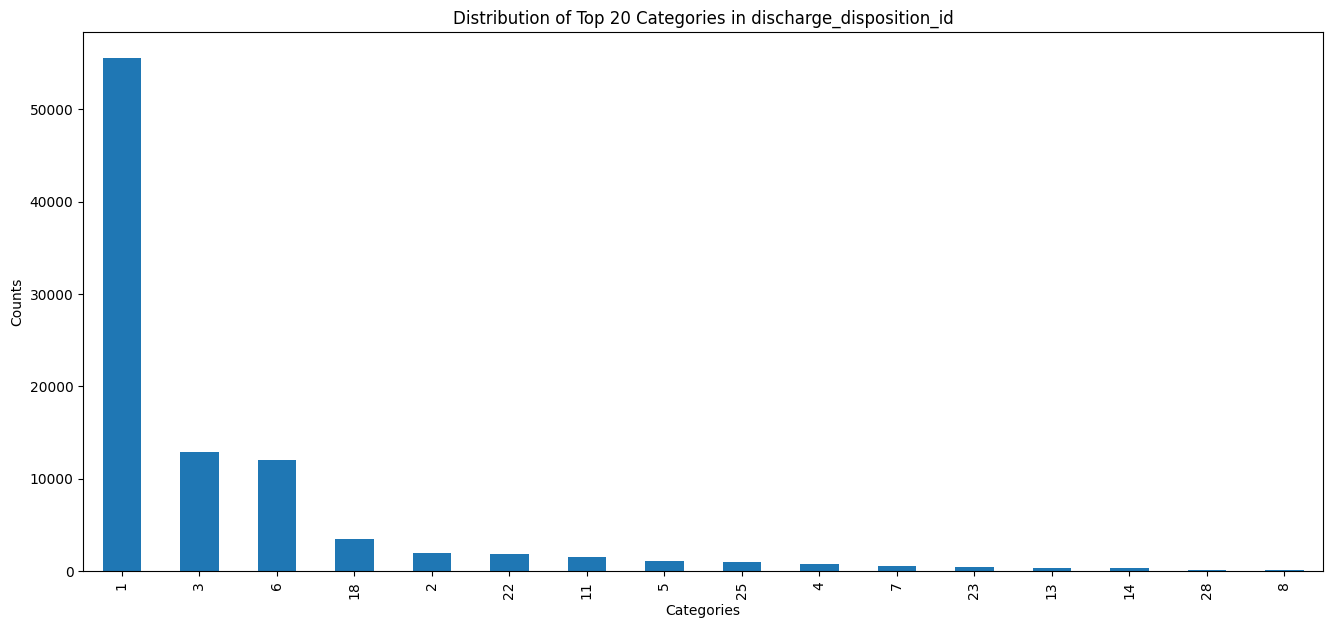

Outliers for admission_source_id
admission_source_id
7     53583
1     27196
17     6329
4      2837
6      1890
2       981
5       801
3       171
20      149
Name: count, dtype: int64


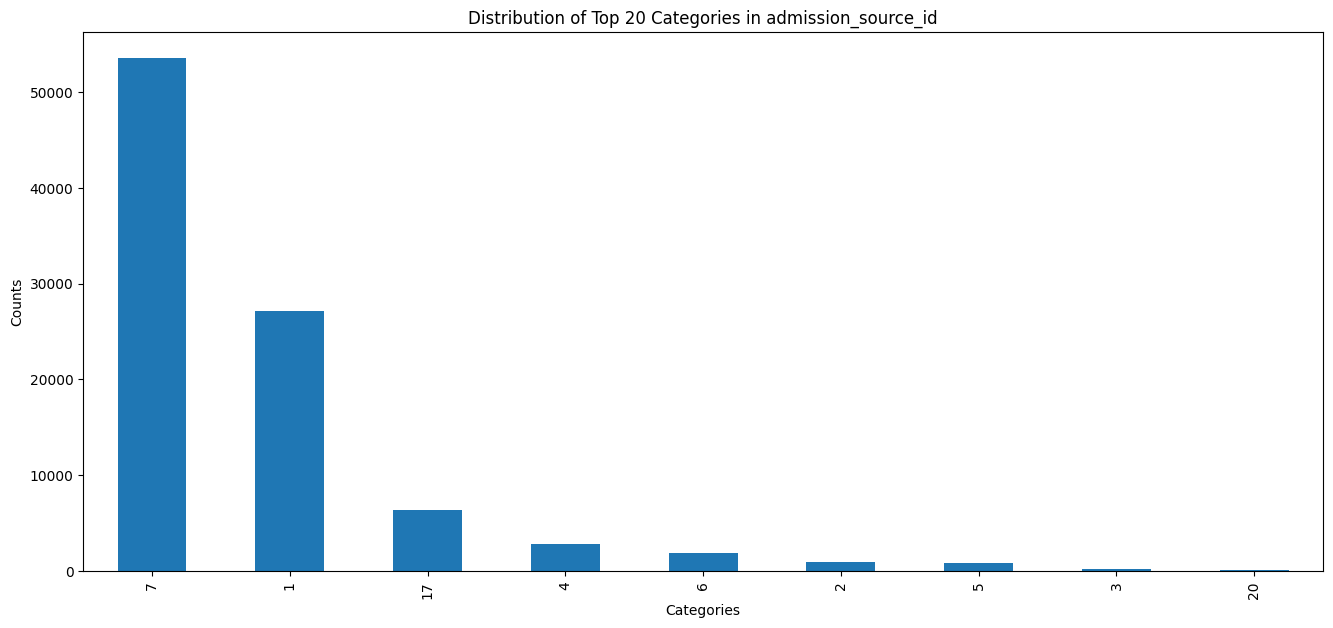

Outliers for payer_code
payer_code
Unknown    37351
MC         29950
HM          5831
SP          4496
BC          4303
MD          3227
CP          2323
UN          2145
CM          1812
OG           970
PO           558
DM           502
CH           138
WC           115
OT            92
MP            73
SI            51
Name: count, dtype: int64


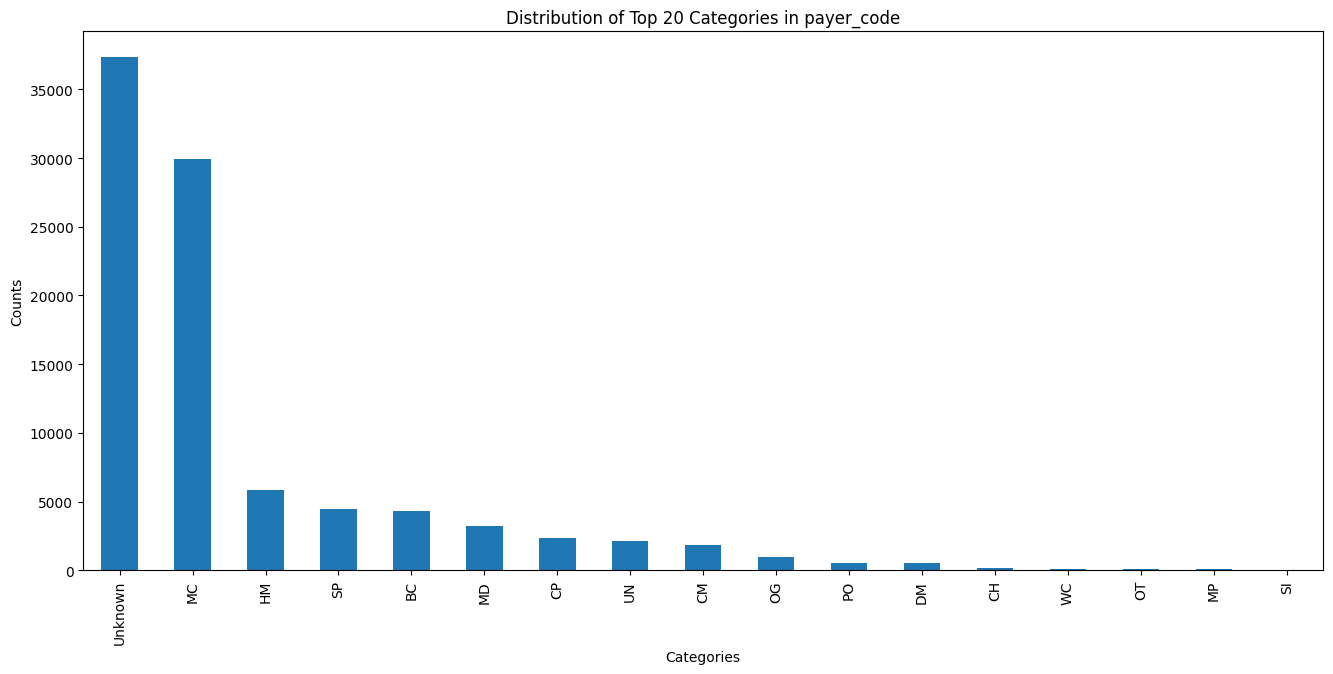

Outliers for medical_specialty
medical_specialty
Unknown Specialty                   46165
InternalMedicine                    13357
Emergency/Trauma                     7109
Family/GeneralPractice               6883
Cardiology                           4957
                                    ...  
Psychiatry-Addictive                    1
Perinatology                            1
Neurophysiology                         1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: count, Length: 73, dtype: int64


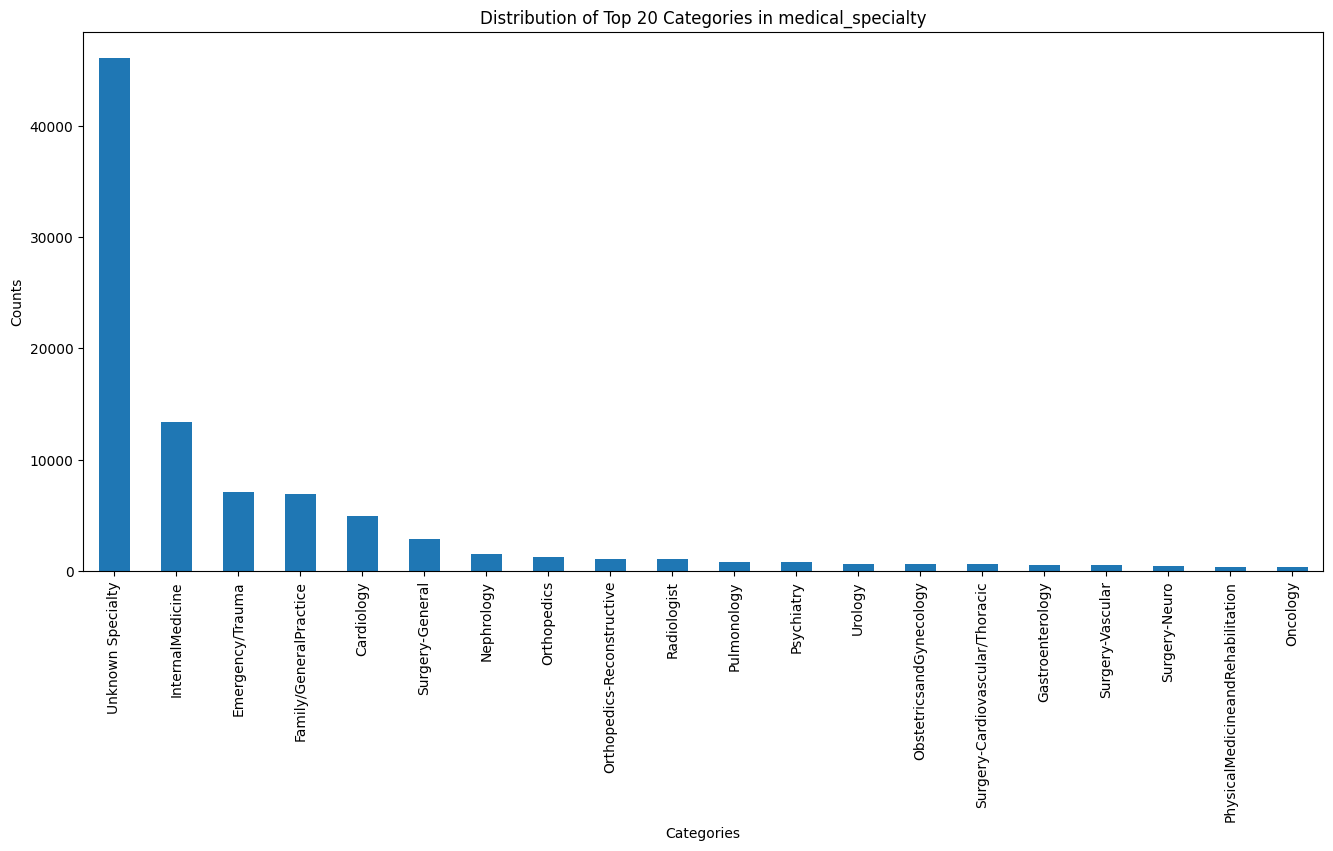

Outliers for metformin
metformin
No        75498
Steady    16921
Up          987
Down        531
Name: count, dtype: int64


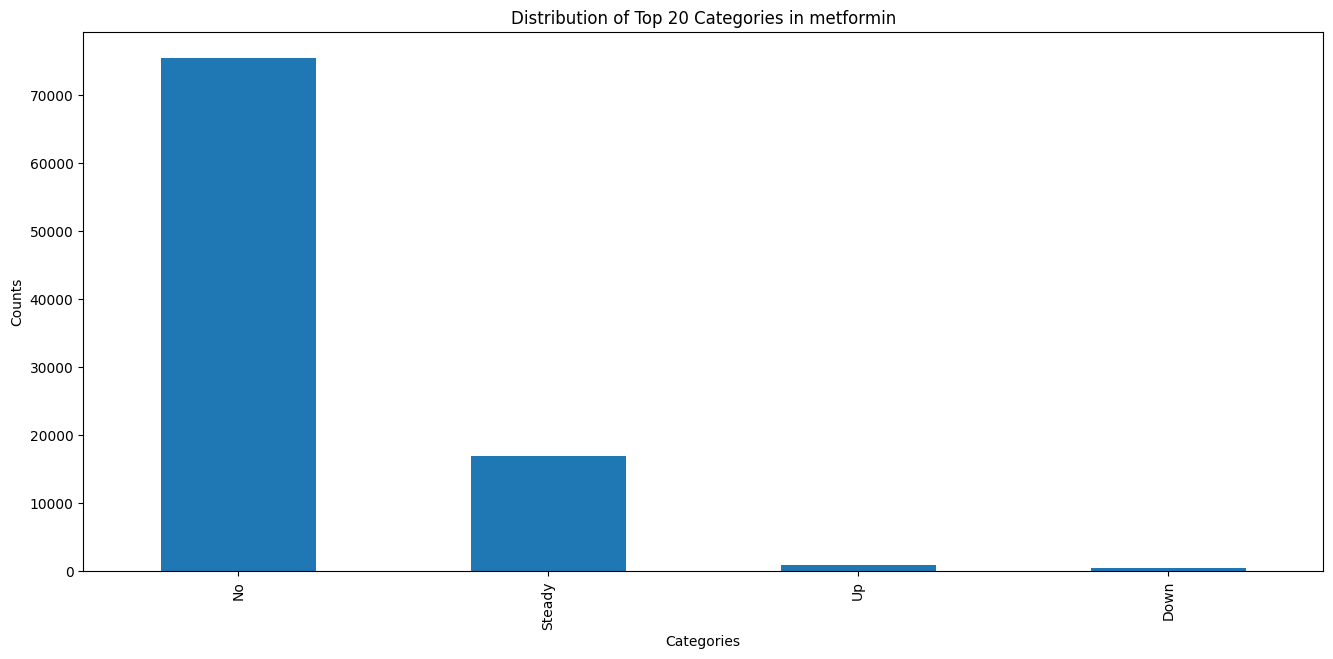

Outliers for repaglinide
repaglinide
No        92487
Steady     1302
Up          105
Down         43
Name: count, dtype: int64


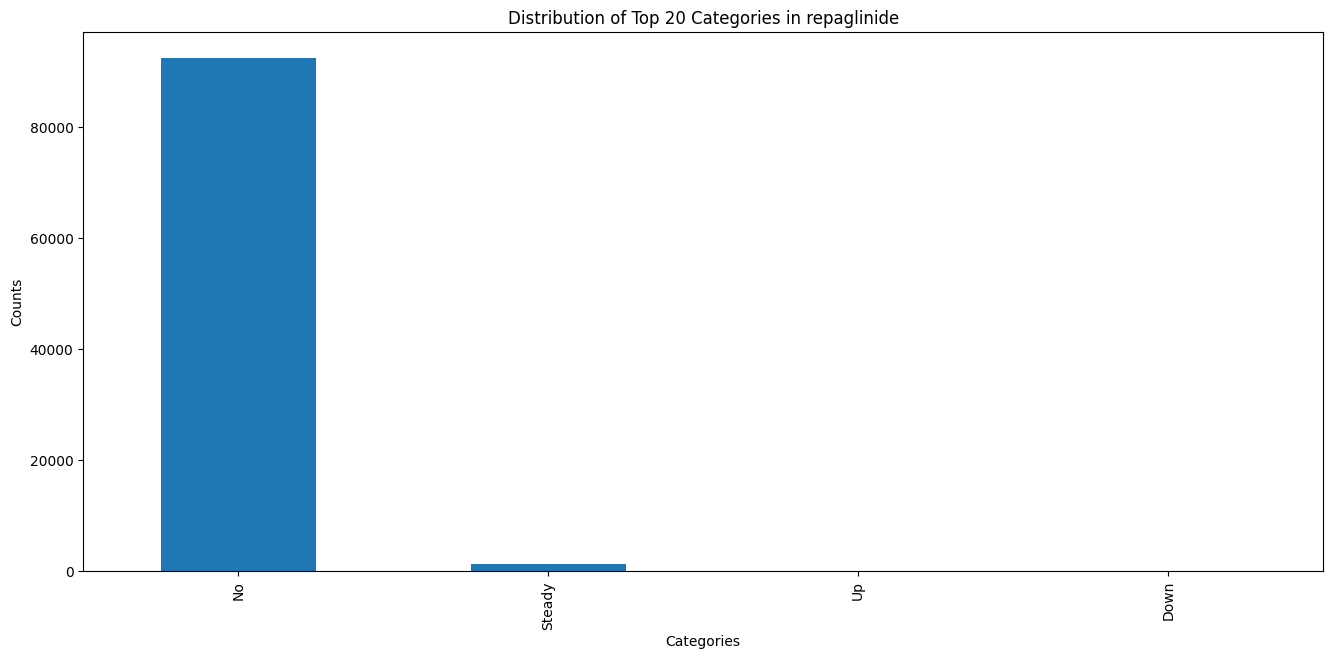

Outliers for nateglinide
nateglinide
No        93281
Steady      623
Up           23
Down         10
Name: count, dtype: int64


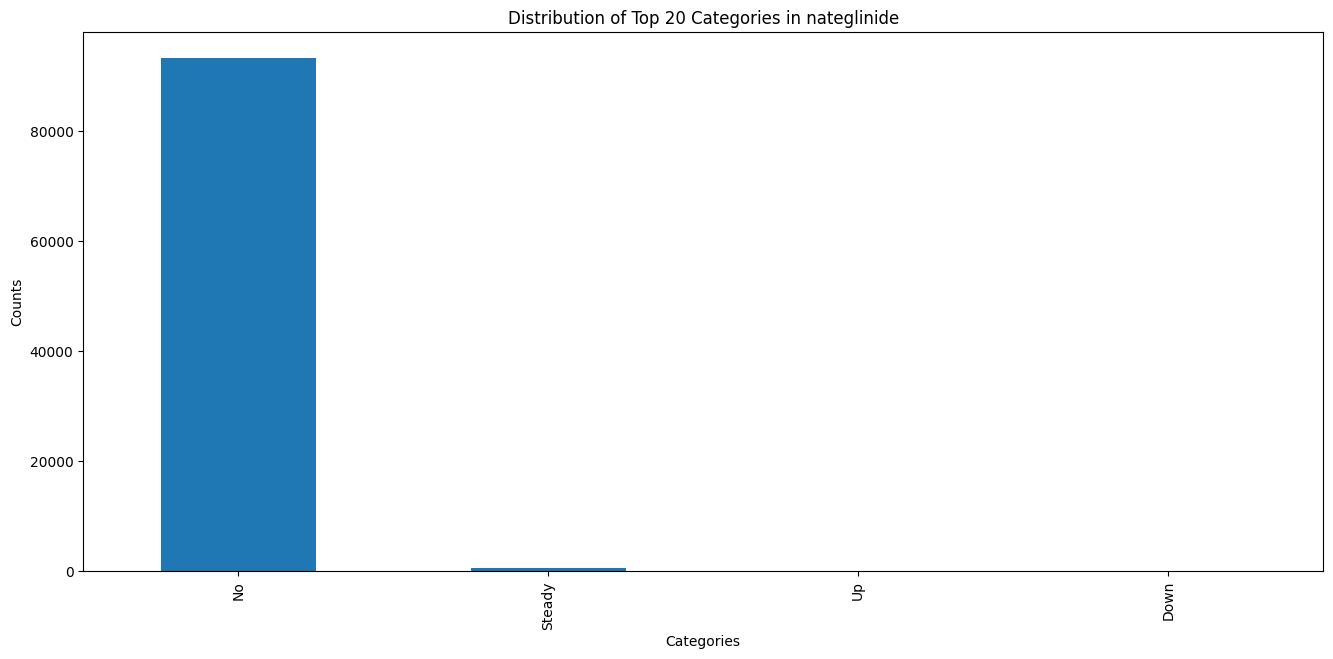

Outliers for chlorpropamide
chlorpropamide
No        93857
Steady       73
Up            6
Down          1
Name: count, dtype: int64


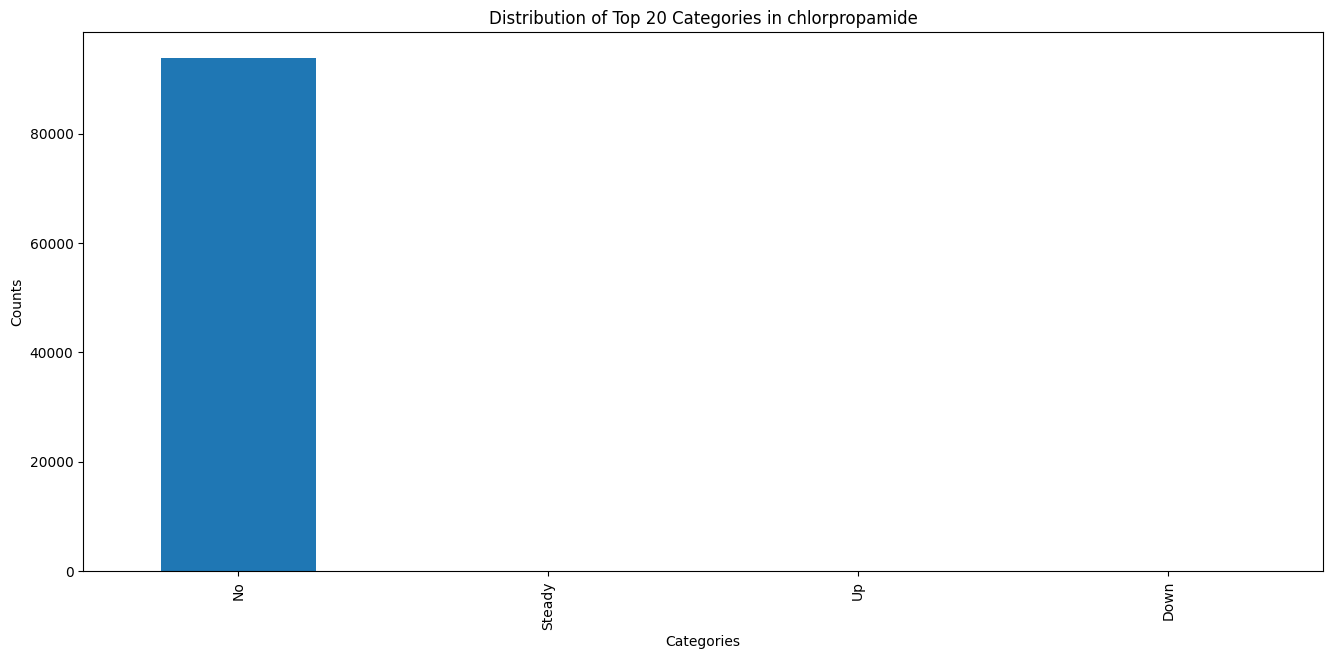

Outliers for glimepiride
glimepiride
No        89190
Steady     4273
Up          297
Down        177
Name: count, dtype: int64


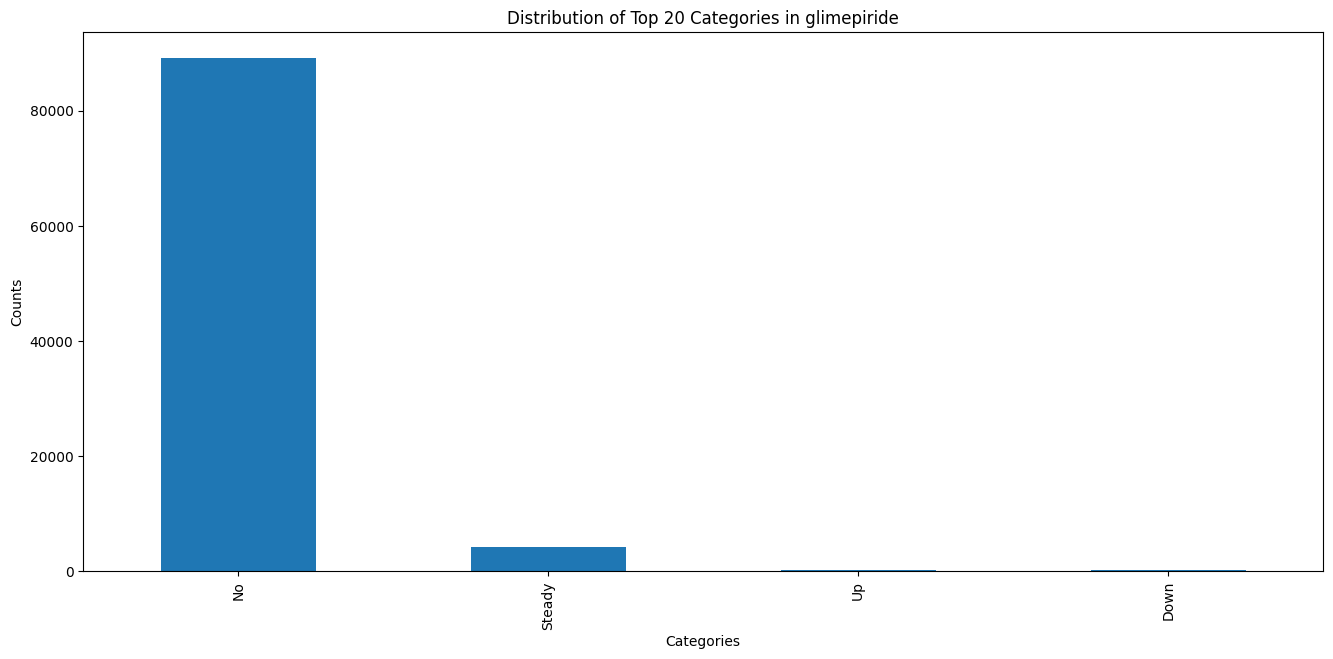

Outliers for acetohexamide
acetohexamide
No        93936
Steady        1
Name: count, dtype: int64


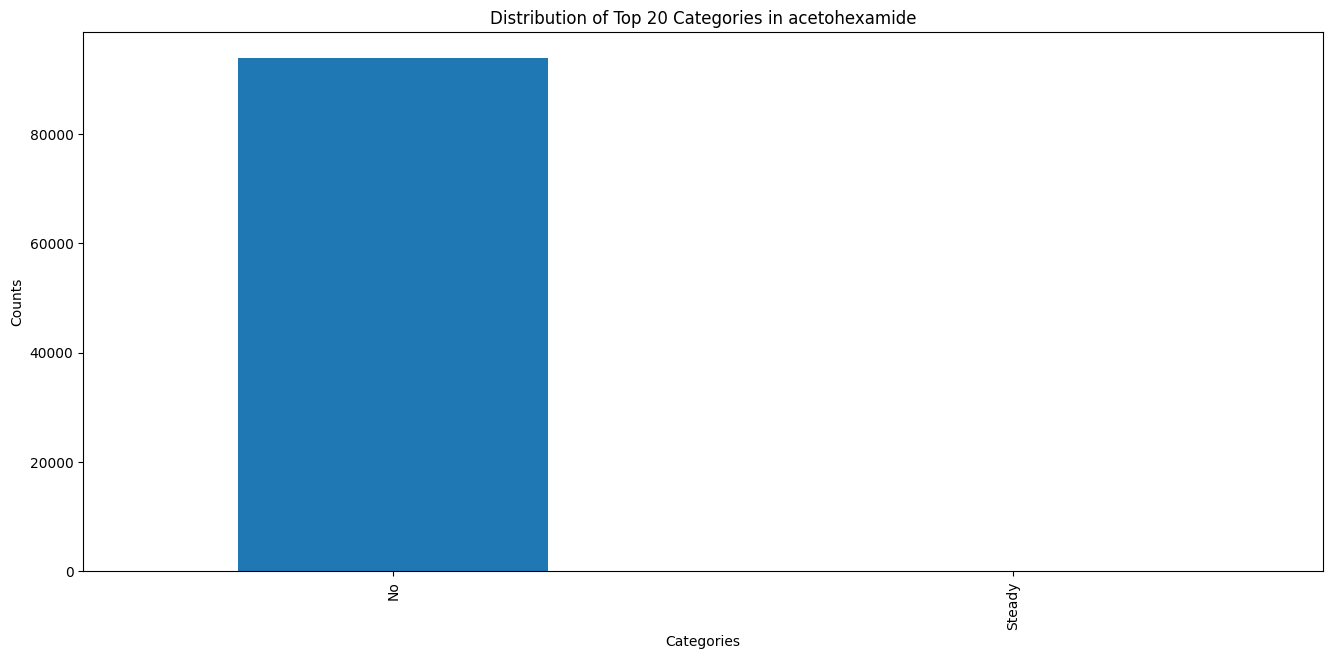

Outliers for glipizide
glipizide
No        82271
Steady    10429
Up          717
Down        520
Name: count, dtype: int64


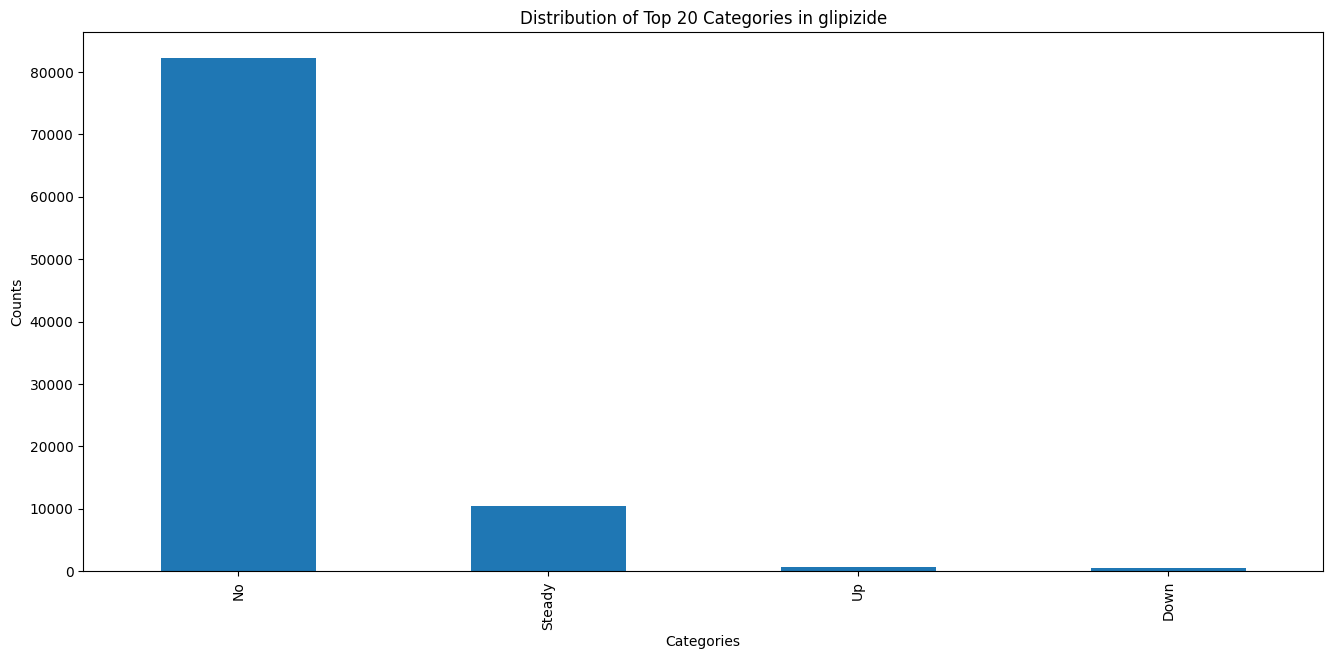

Outliers for glyburide
glyburide
No        84090
Steady     8577
Up          752
Down        518
Name: count, dtype: int64


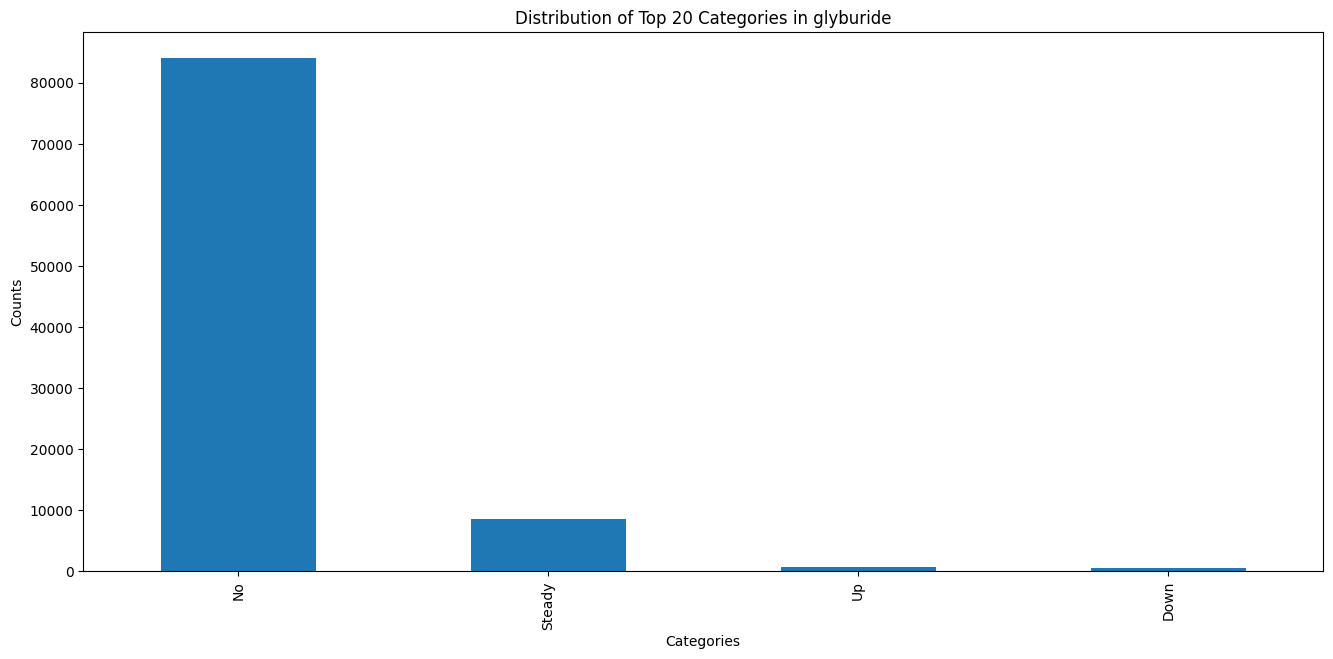

Outliers for tolbutamide
tolbutamide
No        93915
Steady       22
Name: count, dtype: int64


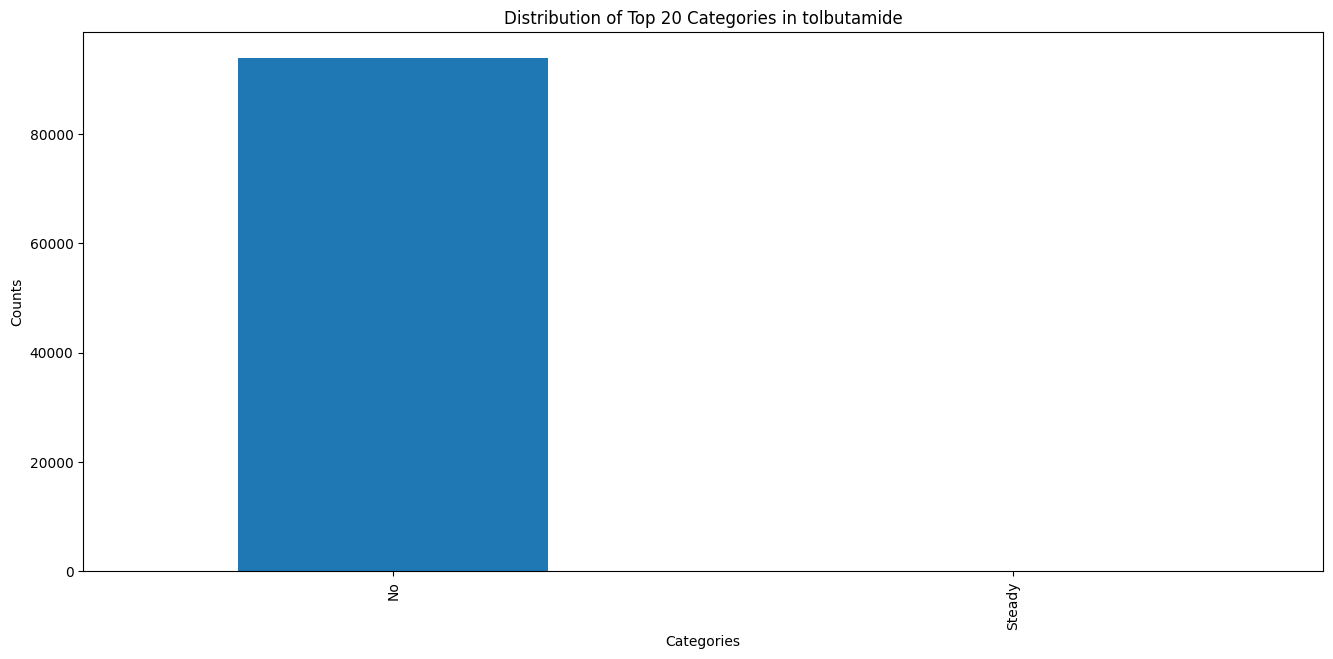

Outliers for pioglitazone
pioglitazone
No        87165
Steady     6443
Up          218
Down        111
Name: count, dtype: int64


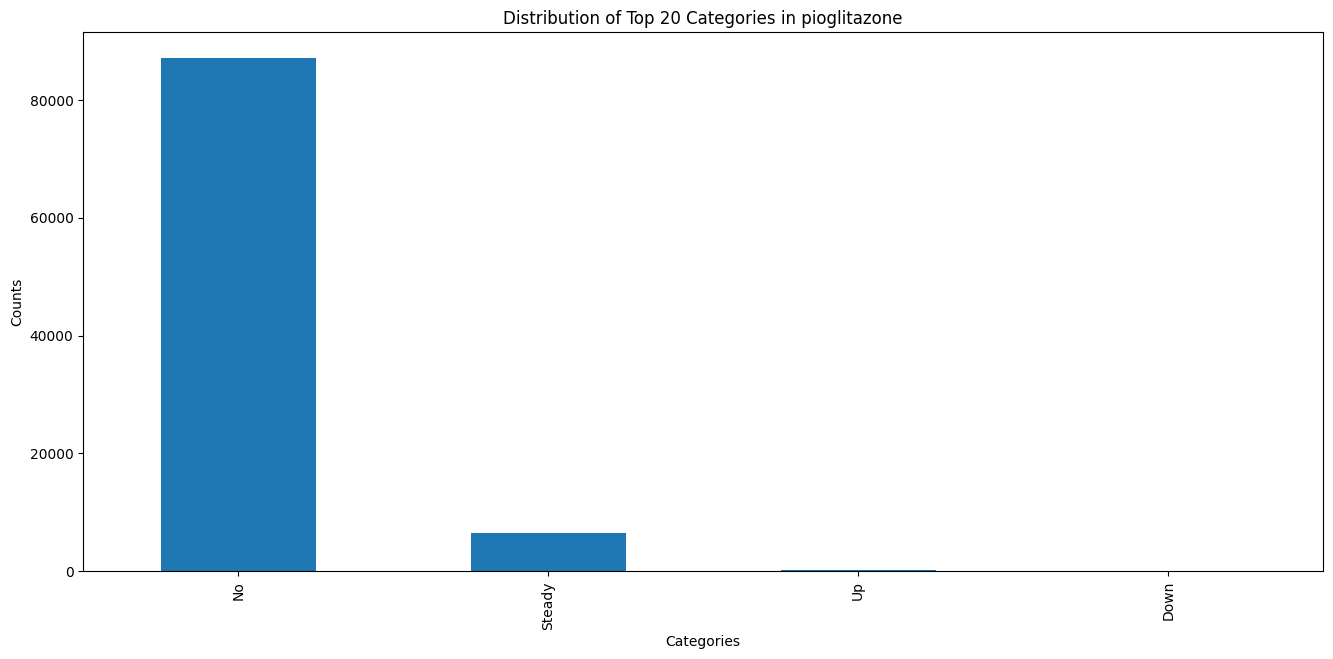

Outliers for rosiglitazone
rosiglitazone
No        88035
Steady     5653
Up          168
Down         81
Name: count, dtype: int64


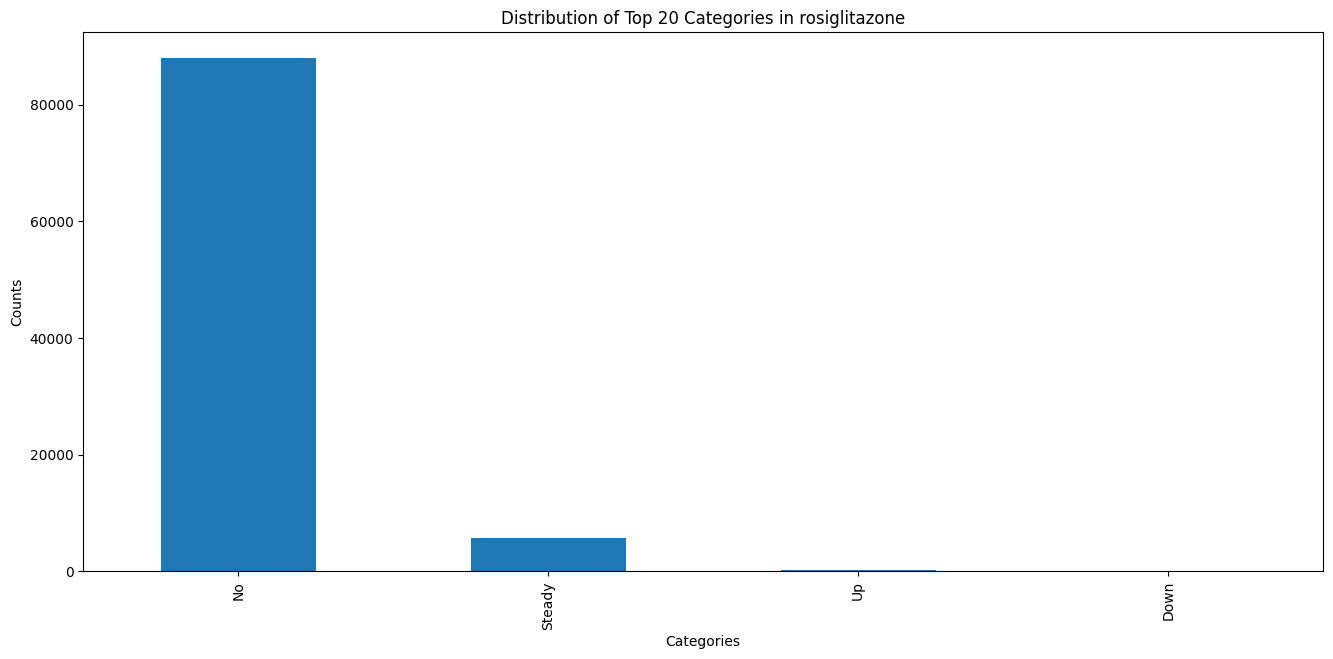

Outliers for acarbose
acarbose
No        93651
Steady      273
Up           10
Down          3
Name: count, dtype: int64


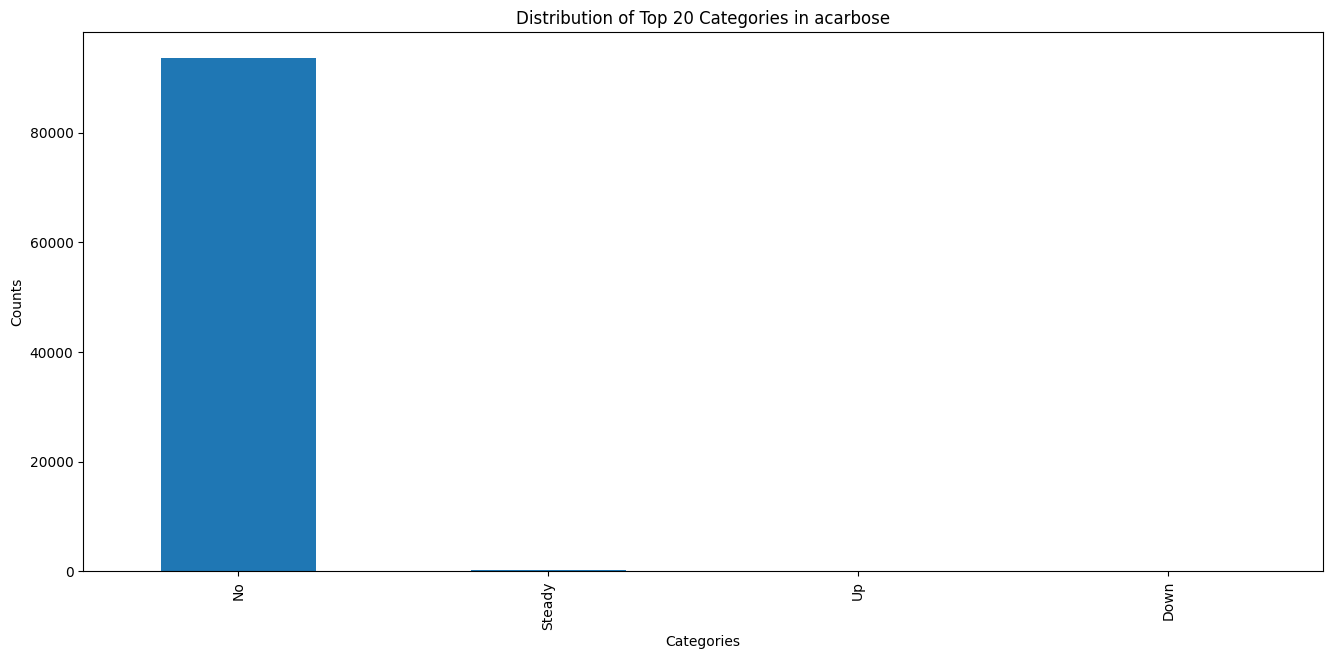

Outliers for miglitol
miglitol
No        93899
Steady       31
Down          5
Up            2
Name: count, dtype: int64


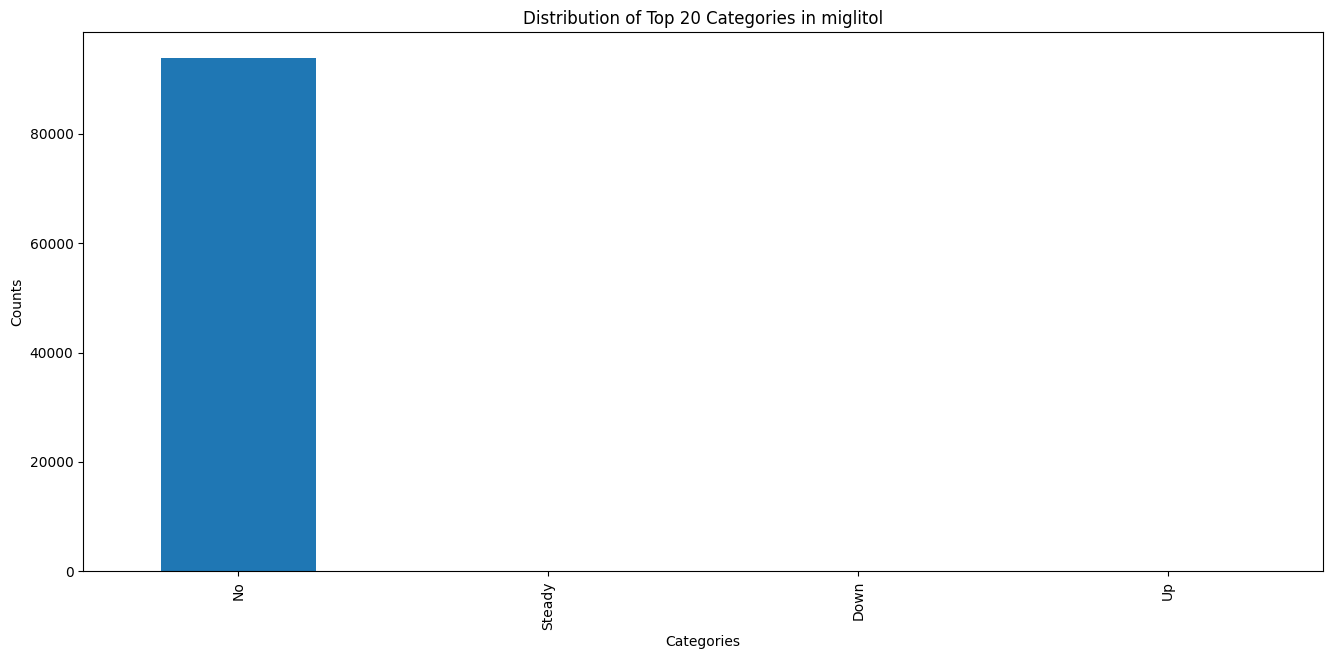

Outliers for troglitazone
troglitazone
No        93934
Steady        3
Name: count, dtype: int64


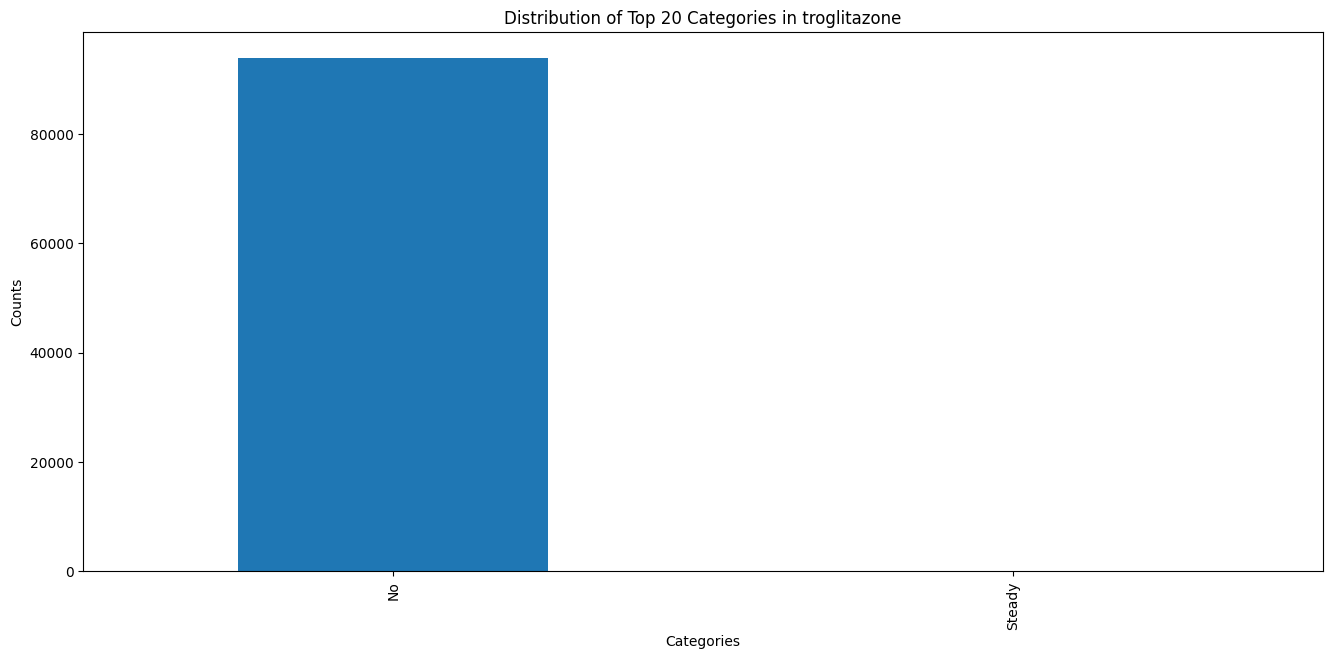

Outliers for tolazamide
tolazamide
No        93900
Steady       36
Up            1
Name: count, dtype: int64


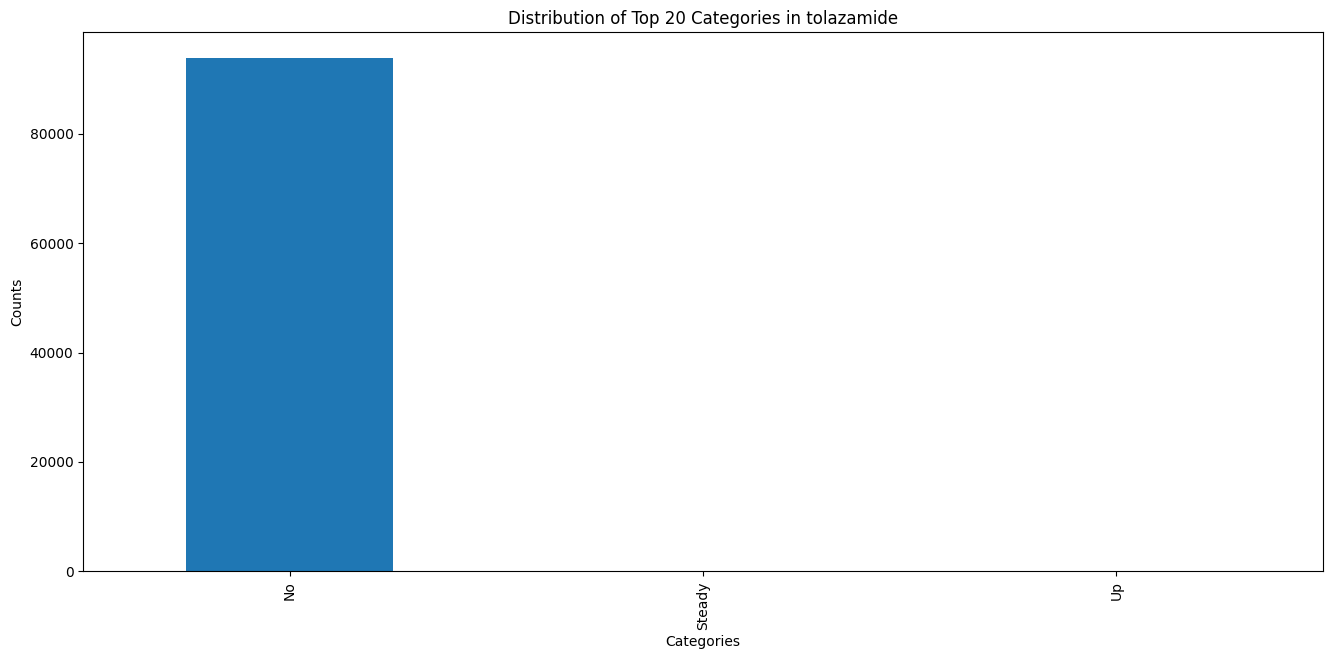

Outliers for examide
examide
No    93937
Name: count, dtype: int64


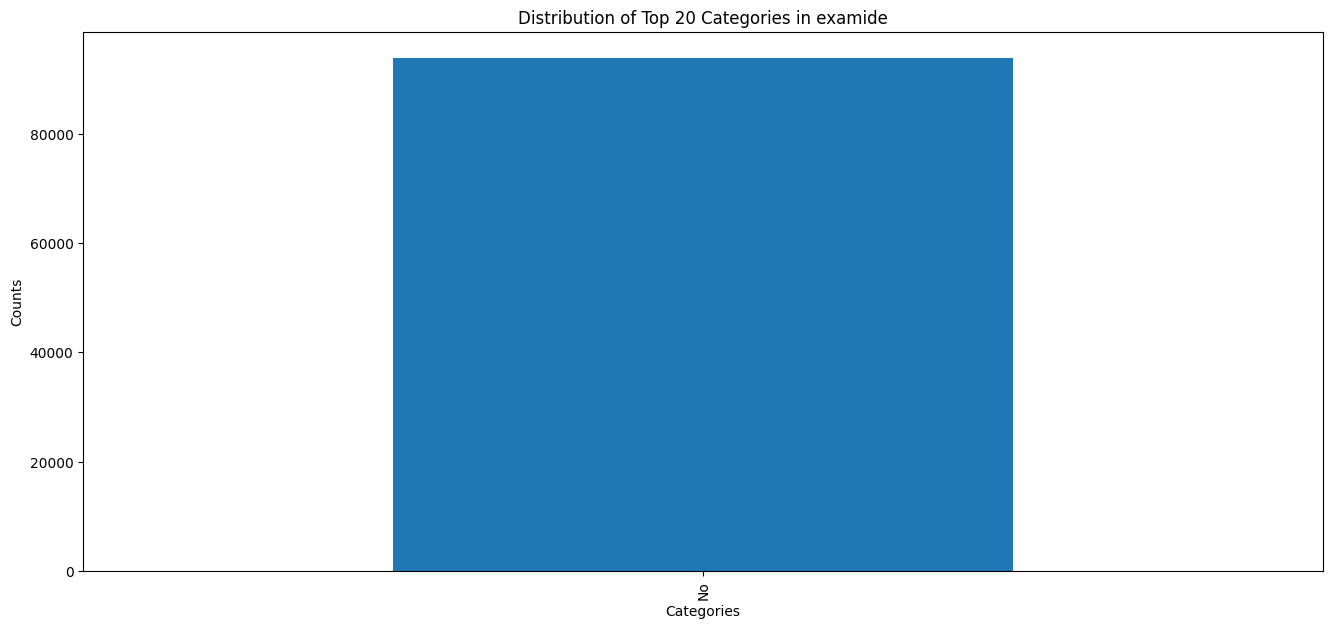

Outliers for citoglipton
citoglipton
No    93937
Name: count, dtype: int64


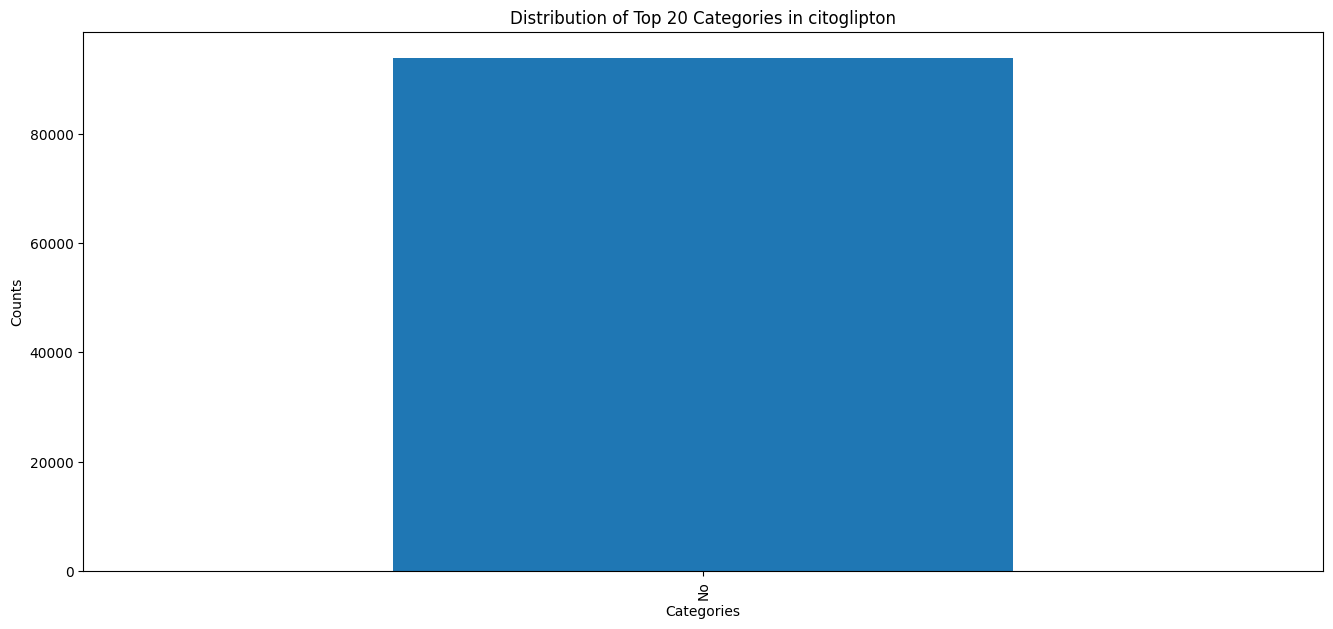

Outliers for glyburide-metformin
glyburide-metformin
No        93292
Steady      637
Up            5
Down          3
Name: count, dtype: int64


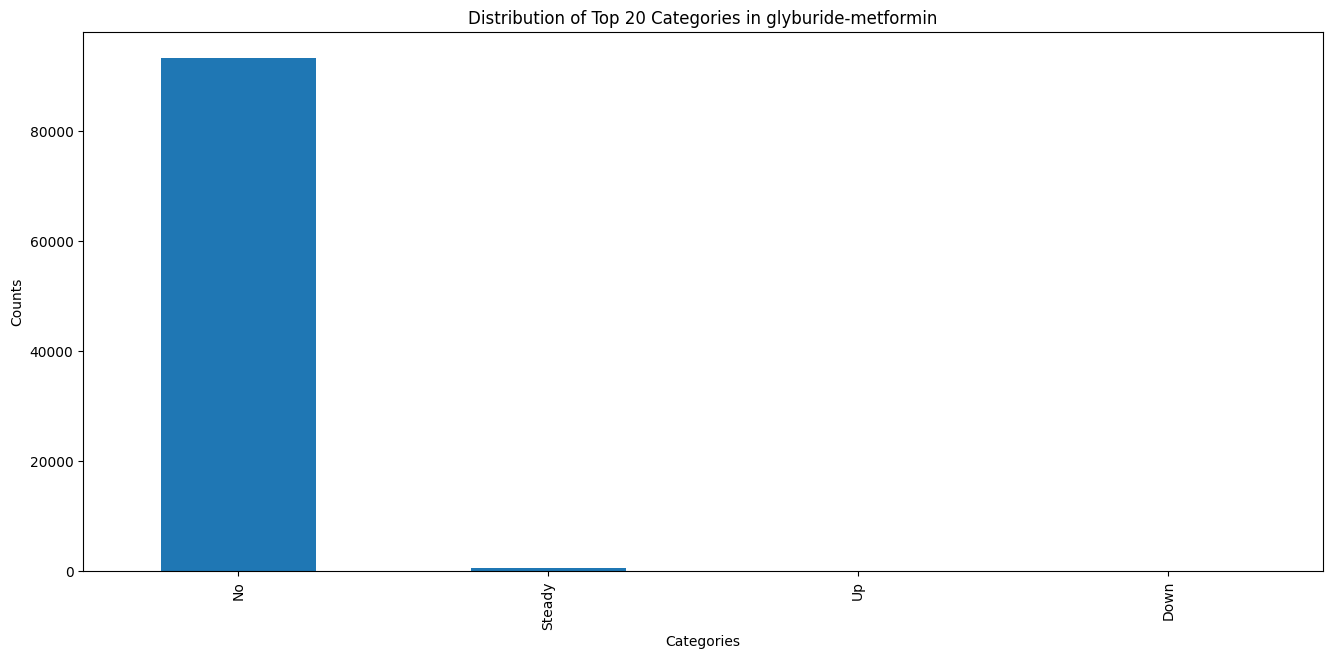

Outliers for glipizide-metformin
glipizide-metformin
No        93924
Steady       13
Name: count, dtype: int64


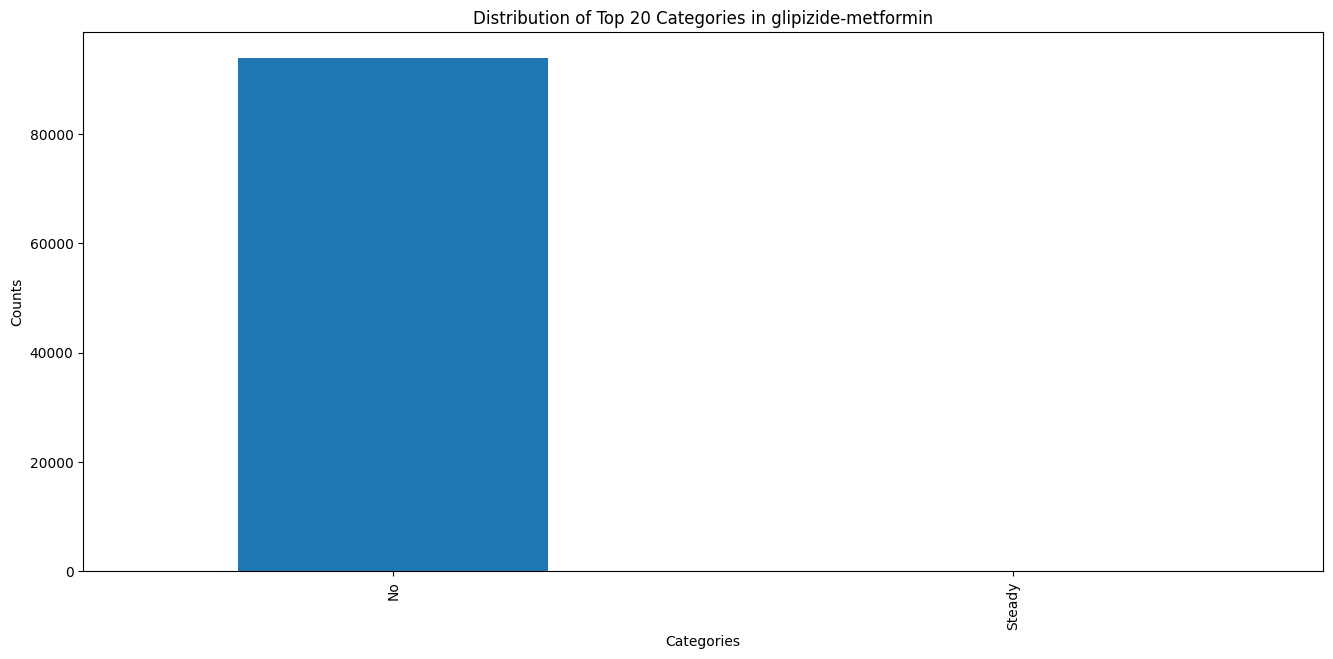

Outliers for glimepiride-pioglitazone
glimepiride-pioglitazone
No        93936
Steady        1
Name: count, dtype: int64


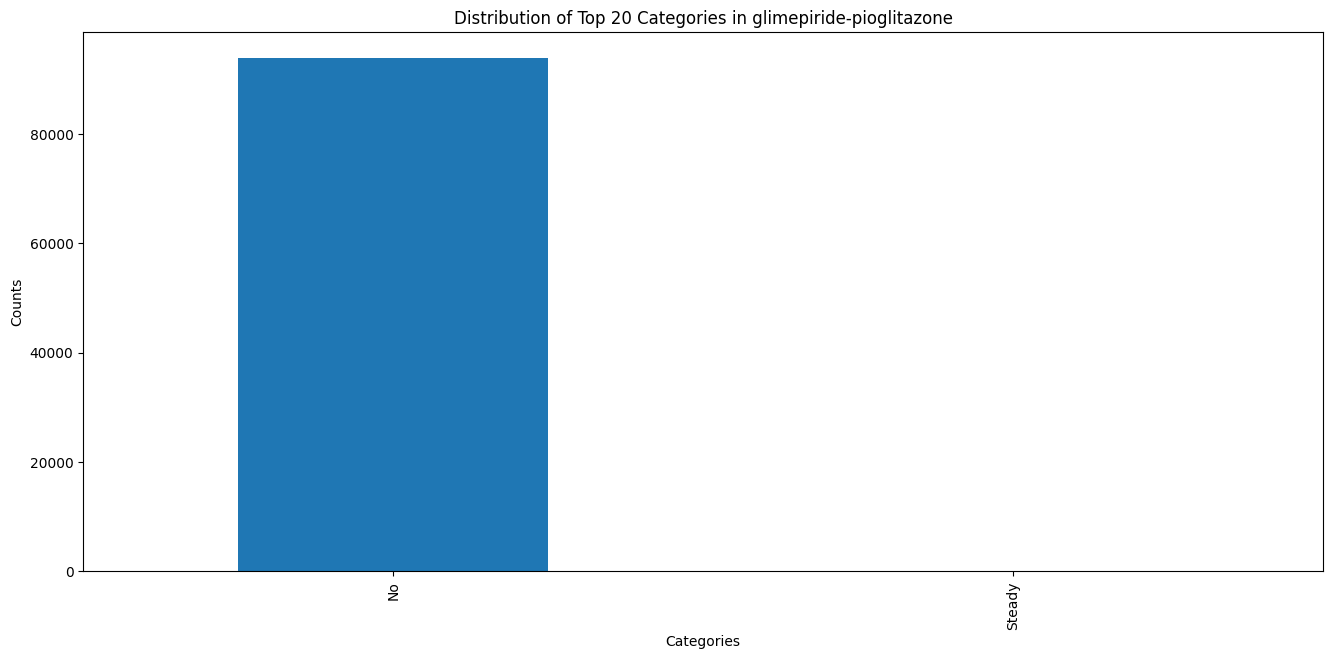

Outliers for metformin-pioglitazone
metformin-pioglitazone
No        93936
Steady        1
Name: count, dtype: int64


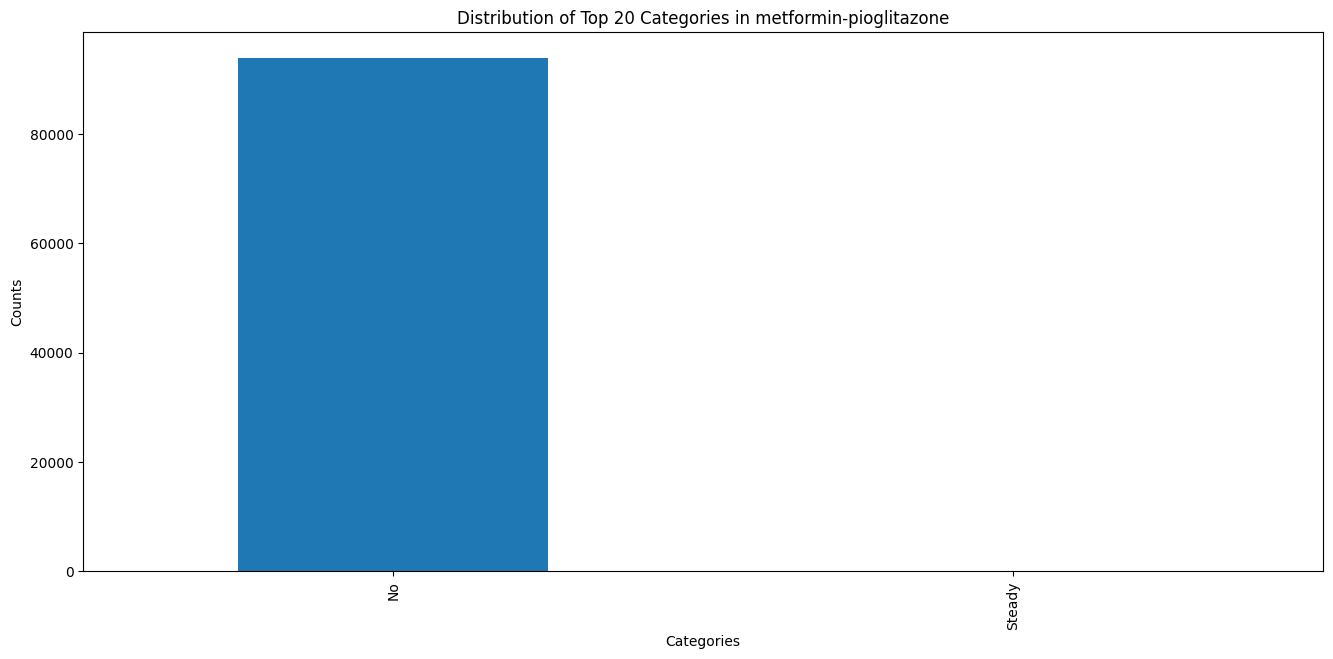

Outliers for metformin-rosiglitazone
metformin-rosiglitazone
No    93937
Name: count, dtype: int64


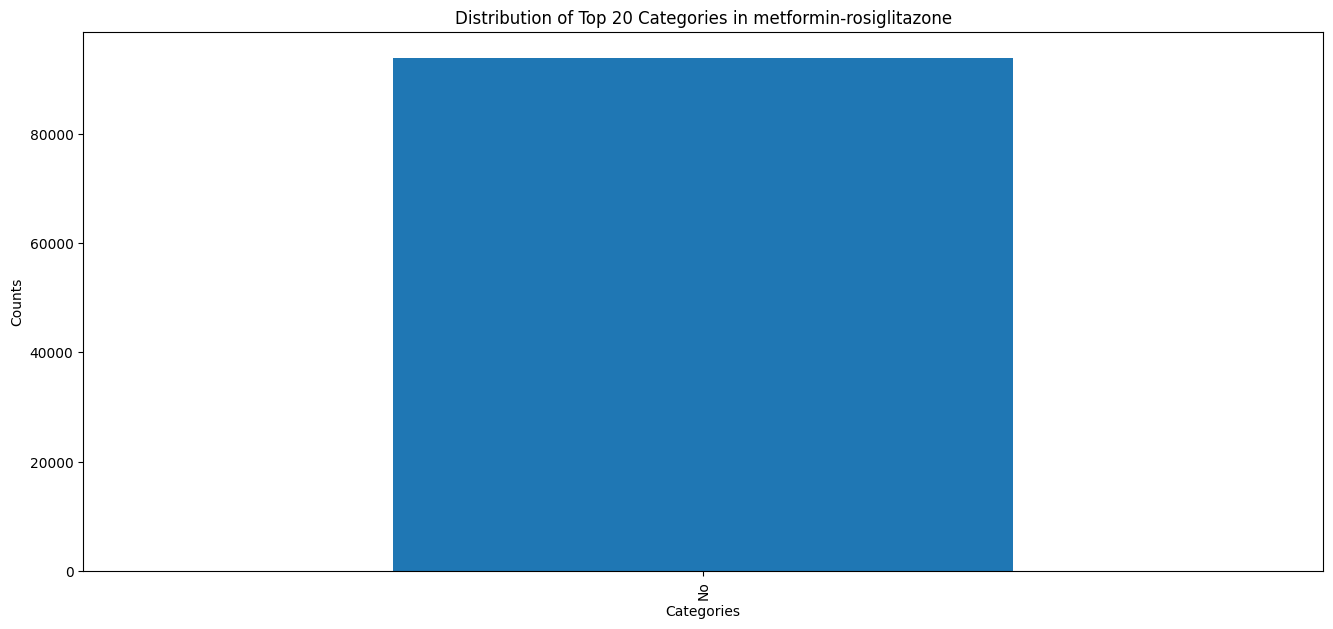

Outliers for change
change
No    50607
Ch    43330
Name: count, dtype: int64


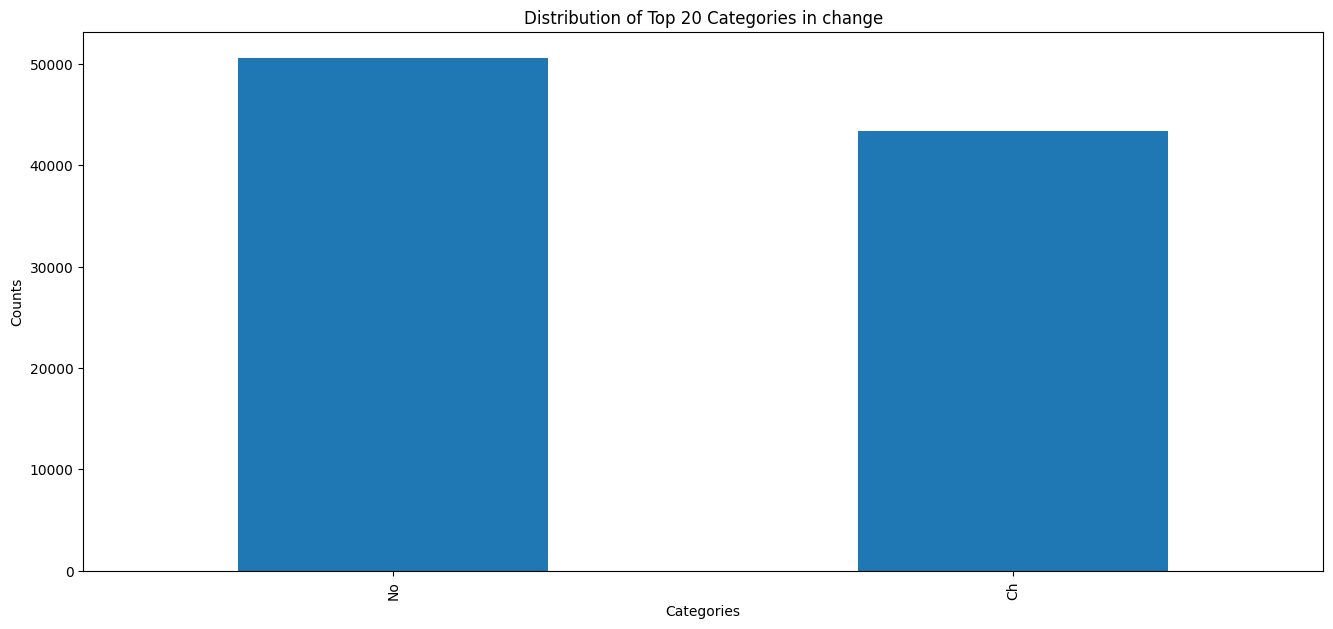

Outliers for diabetesMed
diabetesMed
Yes    72155
No     21782
Name: count, dtype: int64


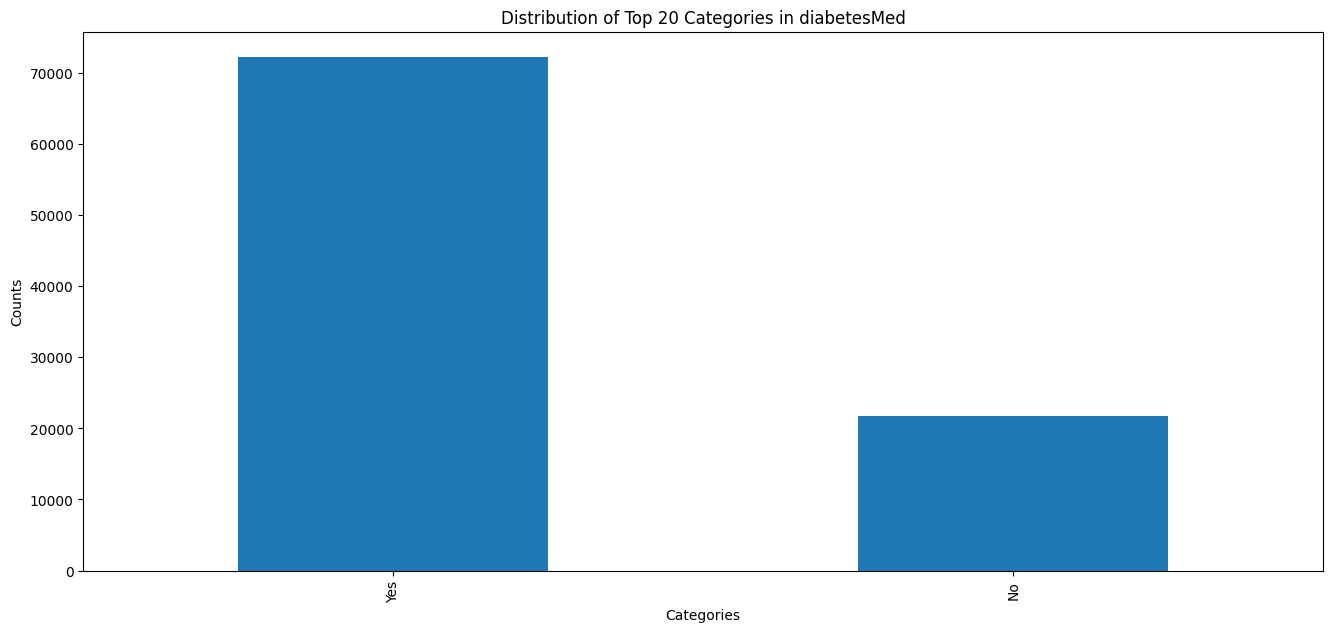

Outliers for readmitted
readmitted
NO     50323
>30    33104
<30    10510
Name: count, dtype: int64


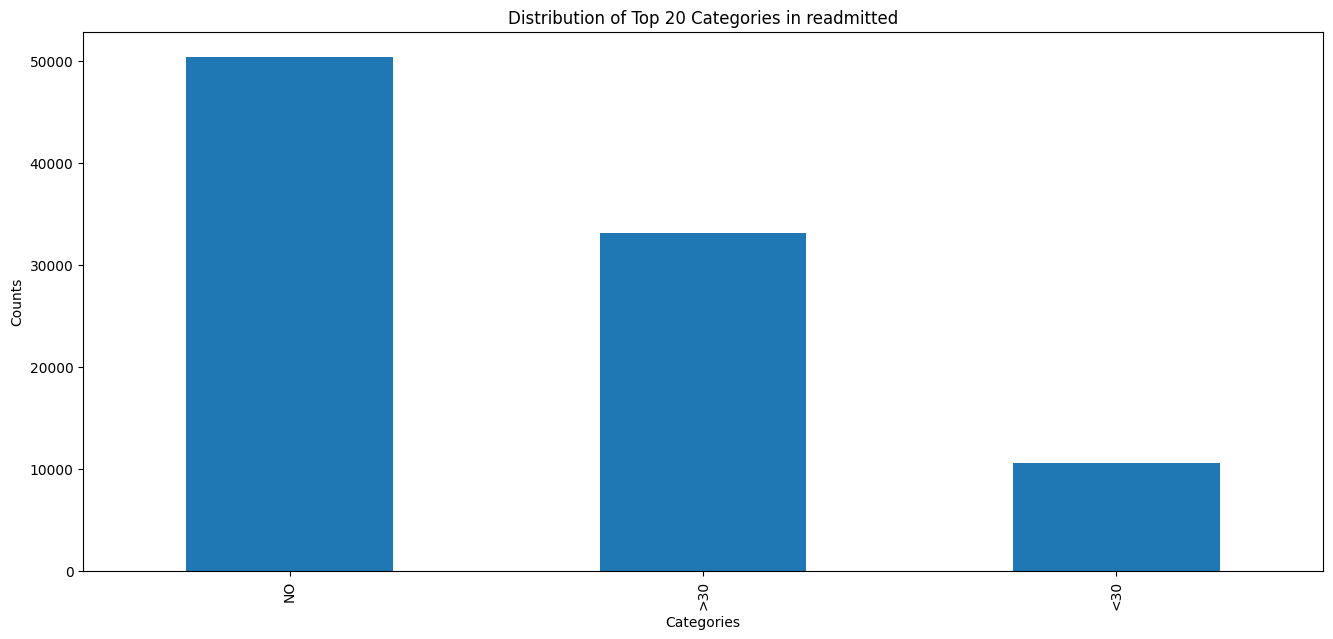

In [ ]:
for col in categorical_attributes:
  print(f"Outliers for {col}")
  categorical_plots(diabetic_df,col)

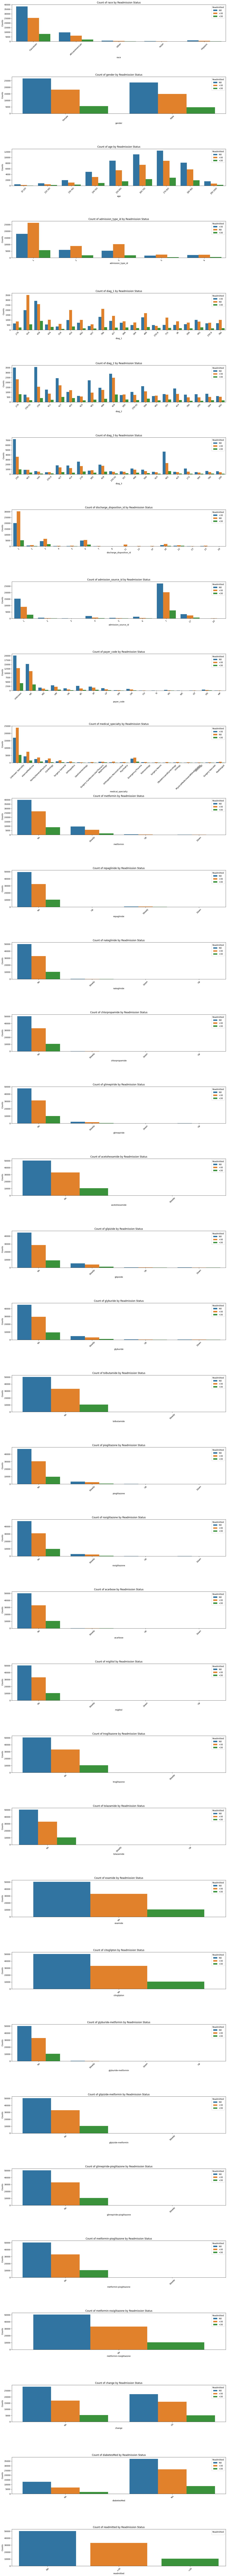

In [ ]:
# Set up the figure size and layout
n_cols = 1
n_rows = len(categorical_attributes)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 5))

# Check if only one row, wrap it in a list for indexing
if n_rows == 1:
    axes = [axes]

# Loop through each categorical attribute to create a count plot
for i, var in enumerate(categorical_attributes):
    # If the variable has more than 20 unique values, filter to top 20 most frequent categories
    if diabetic_df[var].nunique() > 20:
        top_categories = diabetic_df[var].value_counts().index[:20]  # Get top 20 categories
        df_filtered = diabetic_df[diabetic_df[var].isin(top_categories)]
    else:
        df_filtered = diabetic_df

    sns.countplot(x=var, hue='readmitted', data=df_filtered, ax=axes[i])
    axes[i].set_title(f'Count of {var} by Readmission Status')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Counts')
    axes[i].legend(title='Readmitted', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Data definition and data profile

## Data Dictionary for Diabetic Dataset

Below is the data dictionary for the Diabetes 130-US hospitals dataset, which provides detailed descriptions of each retained attribute in the dataset, detailing their significance, data type, and characteristics:

| Attribute                 | Description                                                             | Data Type   | Range/Values                      | Usage Notes |
|---------------------------|-------------------------------------------------------------------------|-------------|-----------------------------------|-------------|
| `race`                    | Race of the patient                                                     | Categorical | Caucasian, Asian, African American, Hispanic, Other | Useful for demographic analysis |
| `gender`                  | Gender of the patient                                                   | Categorical | Male, Female                      | Important for analyzing gender-specific trends |
| `age`                     | Age group of the patient                                                | Categorical | [0-10), [10-20), ..., [90-100)    | Grouped in 10-year intervals |
| `admission_type_id`       | Identifier for the type of admission                                    | Categorical     | 1, 2, 3, ..., 9                  | Includes information like Emergency, Urgent, Elective, etc. |
| `discharge_disposition_id`| Identifier for discharge disposition                                    | Categorical     | 1, 2, 3, ..., 29                 | Includes categories like discharged to home, expired, etc. |
| `admission_source_id`     | Identifier for the source of admission                                  | Categorical     | 1, 2, 3, ..., 21                 | Such as physician referral, emergency room, etc. |
| `time_in_hospital`        | Duration of hospital stay (in days)                                     | Integer     | 1-14 days                        | Indicates the length of hospital stay |
| `medical_specialty`       | Specialty of the admitting physician                                    | Categorical | Cardiology, Orthopedics, etc.    | High cardinality |
| `num_lab_procedures`      | Number of lab tests performed during the encounter                      | Integer     | 0-132                            | Reflects the amount of tests done |
| `num_procedures`          | Number of other procedures (other than lab tests) performed during the encounter | Integer  | 0-6                             | Non-lab test procedures |
| `num_medications`         | Number of distinct medications administered during the encounter        | Integer     | 1-81                             | Reflects the complexity of the medication regimen |
| `num_outpatient`          | Number of outpatient visits of the patient in the year preceding the encounter | Integer | 0-42                           | Useful for outpatient trend analysis |
| `num_emergency`           | Number of emergency visits of the patient in the year preceding the encounter | Integer | 0-76                          | Indicates the frequency of emergencies |
| `num_inpatient`           | Number of inpatient visits of the patient in the year preceding the encounter | Integer | 0-21                          | Useful for readmission risk analysis |
| `diag_1`, `diag_2`, `diag_3` | The primary, secondary, and additional secondary diagnosis (coded)    | Categorical | Varies (ICD-9 codes)            | Critical for clinical assessments |
| `number_diagnoses`        | Number of diagnoses entered to the system                               | Integer     | 1-16                            | Indicator of case complexity |
| `change`                  | Indicates if there was a change in diabetic medications (change/no change) | Categorical | Ch, No                          | Reflects medication adjustments |
| `diabetesMed`             | Indicates if any diabetic medications were prescribed                   | Categorical | Yes, No                          | Key for medication analysis |
| `readmitted`              | Days to inpatient readmission                                           | Categorical | <30, >30, No                     | Critical for readmission analysis |

### Additional Details:
- **Missing Values**: Noted where prevalent; handling strategies depend on specific research requirements.

This data dictionary is intended to guide users through understanding and utilizing the dataset effectively for analyses related to diabetes care and patient readmission.


## Detailed Mappings for Categorical IDs

The following detailed mappings provide descriptions for the categorical identifiers used in the dataset. These identifiers have been categorized based on information from the `IDS_mapping_Updated.csv` to facilitate a deeper understanding and accurate interpretation of the data.

### Admission Type ID Mappings
- `1`: Emergency – The patient was admitted to the hospital as an emergency case.
- `2`: Urgent – The patient was admitted to the hospital on an urgent basis.
- `3`: Elective – The patient's admission was planned as an elective procedure.
- `4`: Newborn – Admission involved a newborn.
- `5`: Not Available – Information not available.
- `6`: NULL – No data available.
- `7`: Trauma Center – Admission from a trauma center.
- `8`: Not Mapped – The admission type is not mapped to any category.

### Discharge Disposition ID Mappings
- `1`: Discharged to home – The patient was discharged to their home.
- `2`: Transferred to another medical facility – The patient was transferred to another hospital or medical facility.
- `3`: Discharged/transferred to a skilled nursing facility (SNF).
- `4`: Discharged/transferred to an intermediate care facility (ICF).
- `5`: Discharged/transferred to another type of inpatient care institution.
- `6`: Discharged/transferred to home with home health service.
- `18`: NULL – No data available.
- `25`: Not Mapped – The discharge disposition is not mapped to any category.

### Admission Source ID Mappings
- `1`: Physician Referral – Admission source was a referral by a physician.
- `2`: Clinic Referral – Admission source was a referral by a clinic.
- `3`: HMO Referral – Admission source was a referral by a Health Maintenance Organization (HMO).
- `4`: Transfer from a hospital – The patient was transferred from another hospital.
- `5`: Transfer from a Skilled Nursing Facility (SNF).
- `6`: Transfer from another health care facility.
- `7`: Emergency Room – The patient was admitted through the emergency room.
- `8`: Court/Law Enforcement – The patient was admitted through a court order or by law enforcement.
- `9`: Not Available – Information not available.
- `17`: NULL – No data available.
- `20`: Not Mapped – The admission source is not mapped to any category.

These mappings are crucial for accurately decoding the data in `admission_type_id`, `discharge_disposition_id`, and `admission_source_id` fields. They ensure that data analysis can be carried out with an understanding of the categorical contexts provided by these identifiers.


In [ ]:
def data_profiling(df, numerical_columns, categorical_columns, placeholder_values):
    """
    Perform data profiling for both numerical and categorical attributes.

    Parameters:
    - df: DataFrame containing the dataset
    - numerical_columns: List of numerical columns
    - categorical_columns: List of categorical columns
    - placeholder_values: List of placeholder values to identify in the dataset

    Returns:
    - None: Prints a detailed profiling report
    """
    print("#############################")
    print("### Numerical Attributes ###")
    print("#############################\n")

    for col in numerical_columns:
        print(f"**Attribute Name:** {col}")
        print("-" * 40)
        print(df[col].describe())
        missing_count = df[col].isna().sum()
        print(f"\nMissing Values: {missing_count}")
        if missing_count > 0:
            print(f"Percentage Missing: {missing_count / len(df) * 100:.2f}%")
        # Detect outliers based on IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        print(f"Outliers Detected: {outliers}")
        print("-" * 40, "\n")

    print("\n#############################")
    print("### Categorical Attributes ###")
    print("#############################\n")

    for col in categorical_columns:
        print(f"**Attribute Name:** {col}")
        print("-" * 40)
        value_counts = df[col].value_counts()
        print(f"Unique Categories: {value_counts.shape[0]}")
        print(f"Most Frequent Categories:")
        print(value_counts.head(5))
        missing_count = df[col].isna().sum()
        print(f"\nMissing Values: {missing_count}")
        if missing_count > 0:
            print(f"Percentage Missing: {missing_count / len(df) * 100:.2f}%")
        placeholder_count = df[col].isin(placeholder_values).sum()
        if placeholder_count > 0:
            print(f"Placeholder Values ({placeholder_count}): {df[col][df[col].isin(placeholder_values)].unique()}")
        print("-" * 40, "\n")


In [ ]:
placeholder_values = ['?', 'Unknown', 'NA']
numerical_attributes = [
   'time_in_hospital', 'num_lab_procedures','num_medications', 'number_diagnoses','num_procedures', 'number_outpatient', 'number_inpatient'
]


In [ ]:
data_profiling(diabetic_df, numerical_attributes, categorical_attributes, placeholder_values)

#############################
### Numerical Attributes ###
#############################

**Attribute Name:** time_in_hospital
----------------------------------------
count    93937.000000
mean         4.401205
std          2.986687
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

Missing Values: 0
Outliers Detected: 2097
---------------------------------------- 

**Attribute Name:** num_lab_procedures
----------------------------------------
count    93937.000000
mean        40.122263
std         16.045117
min          1.000000
25%         35.000000
50%         41.000000
75%         48.000000
max        120.000000
Name: num_lab_procedures, dtype: float64

Missing Values: 0
Outliers Detected: 12736
---------------------------------------- 

**Attribute Name:** num_medications
----------------------------------------
count    93937.000000
mean        16.021962
std          8.115127
min 